In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [8]:
def convert(char):
    return format(ord(char), '09b')

In [9]:
quantization_table = [[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [68, 56, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]]

In [10]:
# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

# Referred from Matlab 2-D DCT page
# https://in.mathworks.com/help/images/ref/dct2.html

def dct(image):
    image_data = image.astype(float)
    m, n = image_data.shape
    image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_division)
    print (y_division)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0.1
    lis_selected = []
    
    T = 0.2
    TL = 0
    TH = 0
    
    pointer = 0
    
    avg = 0
    
    eof = 0
    
#     with open("Data.txt") as f:
#         while True:
#             c = f.read(1)
#             if not c:
#                 print ("End of file")
#                 break
#             print ("Read a character:", c)
#             print (' '.join(format(ord(x), 'b') for x in c))
    
    f = open("Data.txt","r")
    string = f.read()
#     print (string)
    
    data = ''
    for i in string:
        data += convert(i)
#     print (string)
#     print (data)
    

    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            image_dct[x_s:x_e, y_s:y_e] = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            y = 0
            sum_coeff = 0
            avg = 0
            
            if eof == 0:
            
                for l in lis_dct:
                    for k in l:
                        if y == 0:
                            y += 1
                            continue
                        else:
                            y += 1
                            sum_coeff += (k * k)
                            avg += k
    #             print ('sum_coeff = ', sum_coeff)
                F = sum_coeff/64
                avg /= 64
                # Indexes of selected blocks inserted in a list, useful while traversing later
                if F < TF:
                    lis_selected.append((i, j))

                    """ Embedding Code Start """
                    for l in lis_dct:
                        for k in l:
    #                         x = k
                            if T >= 0:
            #                     print ("IN1")
            #                     print (abs(x - T))
                                if abs(k - T) <= 0.1:
                                    current = 0
                                    print ("IN2")

                                    if pointer == len(data):
                                        print ("End of file")
                                        eof = 1
                                        break
#                                         return image_dct
    

                                    c = data[pointer]
                                    pointer += 1
                                    print ("Read a character:", c)
                                    print ("Old K: ", k)
                                    if c == '0':
                                        k += 2
                                    elif c == '1':
                                        k += 3
#                                     k += int(c)
                                    print ("New K: ", k)

                                elif (k - T) > 0.1:
                                    k += 1
    #                                 print (k)

                            else:
                                print ("OUT1")
                                if abs(k - T) <= 0.1:
                                    current = 0
                                    print ("OUT2")

                                    if pointer == len(data):
                                        print ("End of file")
                                        eof = 1
                                        break
#                                         return image_dct


                                    c = data[pointer]
                                    print ("Read a character:", c)
                                    pointer += 1
                                    print ("Old K: ", k)
                                    if c == '0':
                                        k = -2 - k
                                    elif c == '1':
                                        k = -3 - k
#                                     k -= int(c)
                                    print ("New K: ", k)

                                elif (k - T) < 0.1:
                                    k = -1 - k
                    """ Embedding Code Finish """


                lis_F.append(F)
    #             if x < 5:
    #                 print (F)
    #                 print (lis_dct)
    #                 print (avg)
    #                 x += 1
    #                 print ('y = ', y)

#     print ("Avg is ", sum(lis_F) / len(lis_F))
#     print (lis_F)
    print (data)
    print ("Length of lis_F = ", len(lis_F))
    print ("Length of lis_selected = ", len(lis_selected))
#     print (lis_selected)
    return image_dct




In [33]:
data = ''

def decrypt(image_dct, image):
    image_data = image.astype(float)
    image_data_dct = image_dct.astype(float)
    m, n = image_data.shape
#     image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    
    a = 0
    
    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            lis_dct_new = image_data_dct[x_s:x_e,y_s:y_e]
            
            if a < 1:
                print (lis_dct)
                print (lis_dct_new)
                a += 1
            count=1
            for k, l in zip(lis_dct, lis_dct_new):
                print (k)
                print (l)
                count+=1
                if count == 10:
                    break
#                 for m, n in k, l:
#                     if m == n:
#                         continue
#                     elif abs(n - m) == 2:
#                         data += '0'
#                     elif abs(n - m) == 3:
#                         data += '1'
    
    print (data)

In [ ]:
image = cv2.imread('github.jpeg', 0)

# DCT
image_dct = dct(image)
# print (image)

decrypt(image_dct, image)

plt.subplot(131)
plt.imshow(image, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(image_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])

m =  2100
n =  1179
262
147
IN2
Read a character: 0
Old K:  0.248744231037
New K:  2.24874423104
IN2
Read a character: 0
Old K:  0.283798422313
New K:  2.28379842231
IN2
Read a character: 1
Old K:  0.117749352183
New K:  3.11774935218
IN2
Read a character: 0
Old K:  0.107480512251
New K:  2.10748051225
IN2
Read a character: 0
Old K:  0.297544895333
New K:  2.29754489533
IN2
Read a character: 1
Old K:  0.218520021472
New K:  3.21852002147
IN2
Read a character: 0
Old K:  0.157714072858
New K:  2.15771407286
IN2
Read a character: 0
Old K:  0.227129392761
New K:  2.22712939276
IN2
Read a character: 0
Old K:  0.137525377455
New K:  2.13752537745
IN2
End of file
IN2
End of file
IN2
End of file
IN2
End of file
IN2
End of file
IN2
End of file
001001000
Length of lis_F =  4
Length of lis_selected =  2
[[  1.08070313e+02  -2.89855193e+00  -2.36061802e+00   1.26427671e+00
   -3.69791667e-01  -3.02244038e-03   3.36802416e-03   1.98170139e-03]
 [ -2.45102592e+01  -1.02362824e+00  -6.97190634e-01   

 -0.01205952  0.01145247]
[ 0.53383508  0.22052677  0.13478531  0.11280404  0.10136876  0.00160258
  0.00172754 -0.00485968]
[ 0.53383508  0.22052677  0.13478531  0.11280404  0.10136876  0.00160258
  0.00172754 -0.00485968]
[-0.06617647 -0.10428382 -0.20323071 -0.11149263 -0.01102941  0.00434387
  0.00134093  0.00328727]
[-0.06617647 -0.10428382 -0.20323071 -0.11149263 -0.01102941  0.00434387
  0.00134093  0.00328727]
[ 0.03876072  0.00989568  0.10622559  0.01437116  0.01114894 -0.00028432
  0.00106428  0.00256948]
[ 0.03876072  0.00989568  0.10622559  0.01437116  0.01114894 -0.00028432
  0.00106428  0.00256948]
[-0.00264625  0.00197157 -0.00746291 -0.00157828 -0.00185769 -0.00729938
  0.0020093   0.00166288]
[-0.00264625  0.00197157 -0.00746291 -0.00157828 -0.00185769 -0.00729938
  0.0020093   0.00166288]
[ 0.002482    0.00537856  0.01116494  0.00520875 -0.00702874  0.00266598
  0.00524251 -0.00543255]
[ 0.002482    0.00537856  0.01116494  0.00520875 -0.00702874  0.00266598
  0.005242

  0.00084555  0.00233405]
[ 0.00999921  0.00178179  0.00179699  0.00219191  0.00027205  0.00042843
  0.00027443  0.00119038]
[ 0.00999921  0.00178179  0.00179699  0.00219191  0.00027205  0.00042843
  0.00027443  0.00119038]
[-0.00830868 -0.00445629  0.0025146   0.0033537  -0.00031011 -0.00429682
  0.00422148 -0.00122717]
[-0.00830868 -0.00445629  0.0025146   0.0033537  -0.00031011 -0.00429682
  0.00422148 -0.00122717]
this :::::::
[[  6.35156250e+01  -1.41087126e+00  -1.51347432e+00   4.88623883e-01
    1.25000000e-01  -2.01738444e-03   8.87465513e-04  -6.13738228e-03]
 [ -1.72340474e-01   1.08933044e+00   2.34611659e-02  -6.19991123e-01
   -1.41975774e-02  -1.25364518e-03  -6.33558657e-03   1.20452296e-01]
 [ -3.98293303e-02   6.07783016e-01  -3.68853152e-01  -3.67903488e-01
   -5.77424708e-03   3.81138084e-03   6.18516950e-03  -6.08726536e-03]
 [  2.94899897e-01  -7.32411553e-01  -1.32503738e-01  -1.07837728e-01
   -4.92920757e-03  -2.36354517e-03   2.08983393e-03   5.39585389e-03]
 

   5.13630852e-04   3.79611203e-03   2.41202678e-05  -1.23361086e-03]
this :::::::
[[  9.65078125e+01  -2.23323912e+01  -1.24319207e+00   2.27057034e+00
   -6.30208333e-01   1.14610288e-01   3.52997598e-01  -5.07431343e-03]
 [  1.15510136e+01  -4.82384565e+00  -4.00271301e+00  -1.86845029e-01
    5.84040538e-01   2.32186008e-01  -3.38476529e-03  -7.89359162e-03]
 [ -2.54687445e+00   7.67204024e+00  -3.99292168e+00  -1.73294553e+00
    6.28592827e-01   3.65525251e-01   3.73631493e-03   1.01395299e-02]
 [  3.71369848e+00  -1.18619031e+00  -8.30735519e-01   1.07338361e-01
   -1.13599317e-01   3.30462155e-04   1.16879823e-01   3.79890886e-04]
 [ -1.41544118e-01   2.68251255e-01  -4.31117434e-01   4.93058246e-03
    1.04779412e-01   4.07579658e-03  -2.84453225e-03  -4.67816604e-04]
 [ -3.62807175e-01   2.39374206e-01  -2.06282051e-04  -1.00618036e-03
   -2.40169497e-03   1.40704344e-03  -6.20615991e-04  -6.13891216e-04]
 [  1.16413561e-01  -1.18739619e-01   1.12279561e-01   1.17632021e-01
 

 -0.00118878  0.0012015 ]
[ -1.72794118e-01  -2.11257264e-01  -2.14644534e-01   1.26930343e-01
   3.67647059e-03   1.88323922e-04  -2.21508346e-03   1.64170929e-03]
[ -1.72794118e-01  -2.11257264e-01  -2.14644534e-01   1.26930343e-01
   3.67647059e-03   1.88323922e-04  -2.21508346e-03   1.64170929e-03]
[-0.00089219 -0.00825598  0.00037421  0.00426125 -0.12486096  0.00061539
 -0.00150823 -0.00340758]
[-0.00089219 -0.00825598  0.00037421  0.00426125 -0.12486096  0.00061539
 -0.00150823 -0.00340758]
[  1.17391836e-01  -1.03985529e-03  -3.59397546e-03  -6.24089980e-05
  -1.31358277e-03   7.57792157e-04   1.47313913e-03  -1.39983834e-03]
[  1.17391836e-01  -1.03985529e-03  -3.59397546e-03  -6.24089980e-05
  -1.31358277e-03   7.57792157e-04   1.47313913e-03  -1.39983834e-03]
[-0.00840352 -0.00277622 -0.00114613 -0.00463972  0.00210002  0.00491477
  0.00242133  0.00051198]
[-0.00840352 -0.00277622 -0.00114613 -0.00463972  0.00210002  0.00491477
  0.00242133  0.00051198]
this :::::::
[[  9.514

   1.10913986e-01   1.13885029e-01  -3.44656450e-04  -6.49541685e-03]
[ 0.00367647  0.00039136  0.11432203 -0.11799306 -0.11029412  0.00358962
  0.00400676 -0.00320502]
[ 0.00367647  0.00039136  0.11432203 -0.11799306 -0.11029412  0.00358962
  0.00400676 -0.00320502]
[ 0.25101816 -0.11592684  0.00068112  0.00325391 -0.00090248 -0.00167358
 -0.00249778 -0.0051944 ]
[ 0.25101816 -0.11592684  0.00068112  0.00325391 -0.00090248 -0.00167358
 -0.00249778 -0.0051944 ]
[  6.08730046e-03   4.23347744e-03   9.43501651e-05   4.71230074e-04
   2.24242605e-03   1.61899388e-03   7.50811861e-04   3.47794967e-04]
[  6.08730046e-03   4.23347744e-03   9.43501651e-05   4.71230074e-04
   2.24242605e-03   1.61899388e-03   7.50811861e-04   3.47794967e-04]
[ -9.60108691e-05   1.09873247e-03   5.93632814e-03   4.20836803e-03
   4.30070473e-04  -2.54534245e-03   2.81277964e-03  -1.18704124e-03]
[ -9.60108691e-05   1.09873247e-03   5.93632814e-03   4.20836803e-03
   4.30070473e-04  -2.54534245e-03   2.81277964e

  -1.04166667e-02  -1.40547910e-01   1.19543232e-02  -9.09021951e-05]
[-0.32575751  0.34544699  0.01107688  0.07738017 -0.00390629 -0.00466262
 -0.00319473 -0.00037707]
[-0.32575751  0.34544699  0.01107688  0.07738017 -0.00390629 -0.00466262
 -0.00319473 -0.00037707]
[-0.00966422 -0.30019777  0.20099939 -0.11474219  0.         -0.00328575
 -0.00693556 -0.00073598]
[-0.00966422 -0.30019777  0.20099939 -0.11474219  0.         -0.00328575
 -0.00693556 -0.00073598]
[ 0.27275338 -0.12578052 -0.02764273 -0.00318842 -0.00983993 -0.0028932
  0.00392714  0.00544419]
[ 0.27275338 -0.12578052 -0.02764273 -0.00318842 -0.00983993 -0.0028932
  0.00392714  0.00544419]
[ 0.          0.05361358  0.00624243  0.0009395   0.00367647  0.00284434
 -0.00092884  0.00141919]
[ 0.          0.05361358  0.00624243  0.0009395   0.00367647  0.00284434
 -0.00092884  0.00141919]
[-0.00214191 -0.00581875  0.00898929 -0.00117081 -0.00413971 -0.00098153
 -0.00263706  0.00107791]
[-0.00214191 -0.00581875  0.00898929 -0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[  1.26156250e+02   8.06637934e-01  -2.03910078e-01   2.38535931e-01
   -1.25000000e-01   1.35052914e-01   5.94955095e-03  -2.34473449e-03]
 [  1.32122991e+00  -7.77968565e-01   1.03632732e-02  -2.03620583e-01
    3.31159606e-03   3.98223936e-03   5.33940718e-03  -3.21412173e-03]
 [ -5.53607575e-01   3.42603589e-01   1.56250000e-02  -2.02355216e-02
    8.16601853e-03  -4.85688154e-03  -3.62318841e-03  -2.79458784e-04]
 [  1.57032545e-01  -5.62769753e-03   5.11350127e-03   1.72559103e-02
   -2.30877305e-03  -2.03191604e-03  -9.52480613e-03   2.37251724e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -5.60747307e-18
    0.00000000e+00   0.00000000e+00  -3.8109040

   -7.43392883e-04  -7.30393602e-04  -4.37475620e-04  -1.88420635e-04]] [[  1.26882813e+02  -1.11889329e+00  -8.24046716e-01  -2.39296946e-01
   -3.64583333e-02   3.69405687e-03   6.04659464e-04  -2.52620872e-03]
 [  3.85602220e-01   4.66423397e-01   2.36785291e-01   5.03837224e-02
   -1.60990885e-02  -1.06412700e-02  -3.77553103e-03   8.69735074e-04]
 [  2.13299568e-02   2.76331657e-02   1.33367717e-02   3.31447547e-03
    7.00533639e-04   9.32489139e-04   1.28099055e-03   1.27599141e-03]
 [  8.66804308e-03   8.34103346e-03   3.61579142e-03   1.42934190e-03
    1.19378339e-03   1.32741312e-03   1.80853702e-03   1.65530063e-03]
 [  1.83823529e-03   2.22513215e-03   7.57333664e-04   1.44498072e-04
    1.83823529e-03   2.80806672e-03   3.82806072e-03   3.63225640e-03]
 [ -3.96019260e-03  -2.06567294e-03   9.66397835e-04   1.80445221e-03
    5.02230722e-04  -1.15267346e-03  -2.02452605e-03  -1.97201887e-03]
 [ -5.28553528e-03  -3.53956034e-03   1.13318394e-03   4.03608347e-03
    3.828060

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]

    8.76891695e-04  -9.79034061e-04   7.72304964e-04  -4.51294236e-04]] [[  1.27476563e+02   4.48858556e-02  -3.94290254e-02   1.62175924e-02
   -5.20833333e-03   5.76093973e-04   5.49438148e-04  -4.79295491e-04]
 [ -4.11453676e-02   5.40192933e-02  -3.66006336e-02   1.73091205e-02
   -5.65324809e-03   1.93513391e-04   8.85864682e-04  -8.69735074e-04]
 [ -2.81635896e-02   3.94160669e-02  -2.43853152e-02   9.43882757e-03
   -1.69123781e-03  -7.90526121e-04   1.28099055e-03  -1.15349186e-03]
 [ -1.85343913e-02   1.93454876e-02  -1.02969028e-02   3.16308937e-03
    6.76223969e-04  -1.32741312e-03   1.63951858e-03  -1.36204970e-03]
 [ -1.83823529e-03   2.62472233e-03  -1.82836520e-03  -6.15846829e-04
    1.83823529e-03  -1.59064202e-03   1.58563467e-03  -1.27547883e-03]
 [ -9.60156622e-04   3.20679334e-04   8.19272525e-04  -1.80445221e-03
    2.14049359e-03  -1.87772098e-03   1.49558124e-03  -1.06416746e-03]
 [  5.71864195e-04  -8.30498139e-04   1.13318394e-03  -1.50760329e-03
    1.585634

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[  9.15000000e+01  -9.34032842e+00  -1.44698549e+01   2.48504742e+00
    2.04166667e+00  -2.43112313e-01  -1.24714135e-01  -6.16385372e-03]
 [  2.03242201e+01  -1.05785598e+00   6.28034612e+00  -2.62693531e+00
   -1.59923894e+00   1.09327296e-01   1.31012497e-01   1.26529119e-01]
 [  5.41432615e+00   9.19029458e-01   1.24371843e+00  -9.85419994e-01
   -1.14904600e-01  -2.10324396e-03  -9.41610978e-04  -5.86147135e-03]
 [  6.97795009e+00   5.75231625e-03  -3.94648622e+00   7.20763440e-01
    6.96434505e-03   5.59202112e-03   1.90502594e-03  -1.23454912e-01]
 [ -3.52941176e-01   3.73476216e-01   5.48338860e-01  -1.33876845e-01
   -2.35294118e-01  -1.01449796e-03  -1.48038640e-04   1.12645305e-01]
 [ -3.78180226e-01   2.35972016e-01   1.24441123e-01   7.04643643e-03
    1.30675684e-01   6.57913373e-04   2.15407074e-03  -9.15121077e-04]
 [ -4.91662759e-01   7.75889849e-04   3

   -6.69993756e-03   4.87529919e-03  -1.22891112e-03   1.39931815e-03]]
[ 94.75        -1.17824522  -3.43465214   0.38211181  -1.11458333
  -0.505868    -0.35774453  -0.22660518]
[ 94.75        -1.17824522  -3.43465214   0.38211181  -1.11458333
  -0.505868    -0.35774453  -0.22660518]
[ 4.65727861  3.35273232  1.732152    7.5536461   0.11897678  0.24598819
 -0.11620625  0.12720625]
[ 4.65727861  3.35273232  1.732152    7.5536461   0.11897678  0.24598819
 -0.11620625  0.12720625]
[ 11.4431936    4.93846406  -0.75522693  -1.49955494   0.38315212
   0.11949079  -0.22621387  -0.23714243]
[ 11.4431936    4.93846406  -0.75522693  -1.49955494   0.38315212
   0.11949079  -0.22621387  -0.23714243]
[ 1.44725334 -0.70314567 -1.09049595  1.24049527  0.00419488 -0.11044849
 -0.00421682  0.00190994]
[ 1.44725334 -0.70314567 -1.09049595  1.24049527  0.00419488 -0.11044849
 -0.00421682  0.00190994]
[ 0.53308824 -0.53706207 -0.53692503 -0.25156807 -0.23529412 -0.00155697
  0.00370405 -0.00401341]
[ 0.5

 -0.01676922 -0.00474952]
[ 0.28287846  0.27129638  0.29739931  0.21490022  0.12212425  0.00400634
 -0.01676922 -0.00474952]
[-0.00200152  0.00987077 -0.03219782  0.00788346 -0.00408301 -0.0040829
 -0.00459336  0.00342936]
[-0.00200152  0.00987077 -0.03219782  0.00788346 -0.00408301 -0.0040829
 -0.00459336  0.00342936]
[-0.01355307 -0.26430984 -0.0177565  -0.09027812 -0.01243232 -0.00090659
 -0.00161355  0.00559365]
[-0.01355307 -0.26430984 -0.0177565  -0.09027812 -0.01243232 -0.00090659
 -0.00161355  0.00559365]
[-0.00551471  0.0010872  -0.00182837  0.00148679 -0.00183824  0.00384015
  0.00158563 -0.00052832]
[-0.00551471  0.0010872  -0.00182837  0.00148679 -0.00183824  0.00384015
  0.00158563 -0.00052832]
[ -9.33159196e-05  -3.48378787e-03  -2.65376221e-03  -2.37650928e-03
  -5.23033799e-03   2.08091335e-03  -1.18505615e-03   1.39188156e-03]
[ -9.33159196e-05  -3.48378787e-03  -2.65376221e-03  -2.37650928e-03
  -5.23033799e-03   2.08091335e-03  -1.18505615e-03   1.39188156e-03]
[-0.0

   -1.19111754e-01  -3.20999342e-03  -4.57570258e-03  -1.16247300e-01]] [[  7.12500000e+01  -2.26735437e+00  -1.01769330e+01   2.06431384e-01
    1.39583333e+00   9.91588524e-03  -1.15802207e-03  -6.02601808e-03]
 [ -2.30499632e+00   4.01161584e-01   2.18287175e+00   4.07624455e-01
   -7.07938393e-01   6.08135369e-03  -3.54008140e-03   3.24518934e-03]
 [ -7.31404153e+00   1.99941193e+00   5.72876026e+00  -1.00146482e+00
   -7.49661416e-01   1.17929634e-01  -1.81159420e-03   1.23977677e-01]
 [  3.40246581e+00  -2.24958640e-01  -2.30686587e+00  -8.57624756e-02
    6.00040078e-01   6.69901788e-03  -1.40091905e-03  -2.44533229e-03]
 [  2.97794118e-01  -3.82166513e-01  -4.45430657e-01   5.06658788e-01
   -3.67647059e-03   3.12320591e-03   5.98788984e-04  -1.15135859e-01]
 [ -6.18300176e-01   6.21355982e-03   5.12771200e-01  -6.99243016e-03
   -1.29996559e-01  -3.06100538e-03  -4.50275035e-05   1.81449703e-04]
 [  1.14545265e-01   5.17418679e-04   1.60256410e-03  -1.17653221e-01
    1.153359

  -6.81085777e-01  -1.16475289e-02   1.67805233e-02  -4.78792285e-03]
[-0.75735294  0.57023557  0.2167866  -0.24024591  0.09558824  0.00212675
 -0.00861231 -0.12496487]
[-0.75735294  0.57023557  0.2167866  -0.24024591  0.09558824  0.00212675
 -0.00861231 -0.12496487]
[ 0.11671416 -0.33036568 -0.12117506  0.36624157  0.13211022 -0.11515916
 -0.12595946  0.00512177]
[ 0.11671416 -0.33036568 -0.12117506  0.36624157  0.13211022 -0.11515916
 -0.12595946  0.00512177]
[-0.01499737 -0.11608022 -0.0067991  -0.10705947  0.00960716  0.11432094
  0.01500954 -0.00717935]
[-0.01499737 -0.11608022 -0.0067991  -0.10705947  0.00960716  0.11432094
  0.01500954 -0.00717935]
[ 0.00126168 -0.00981346  0.00492768 -0.01227513 -0.01429364  0.00350701
 -0.02161714  0.00248589]
[ 0.00126168 -0.00981346  0.00492768 -0.01227513 -0.01429364  0.00350701
 -0.02161714  0.00248589]
this :::::::
[[  9.33437500e+01  -8.86666445e+00  -4.19929077e+00   5.72619866e-01
    4.89583333e-01   2.50561197e-01   1.12908152e-01   

  0.12523439  0.00422408]
[-1.24278115 -1.87403146  0.83270178  0.30515949  0.11372075  0.00358149
  0.12523439  0.00422408]
[-0.11948529 -0.3706368   0.32337382 -0.12451364  0.11580882 -0.00055872
  0.11870855  0.00168892]
[-0.11948529 -0.3706368   0.32337382 -0.12451364  0.11580882 -0.00055872
  0.11870855  0.00168892]
[-0.2606315   0.22216561 -0.12823894  0.00151756 -0.00049044  0.11536376
  0.00067731  0.00635594]
[-0.2606315   0.22216561 -0.12823894  0.00151756 -0.00049044  0.11536376
  0.00067731  0.00635594]
[ -4.81178747e-03   1.32320637e-01  -1.13318394e-03   3.51867289e-03
   2.11841279e-03   1.93385508e-05  -3.91545688e-03   1.37938265e-03]
[ -4.81178747e-03   1.32320637e-01  -1.13318394e-03   3.51867289e-03
   2.11841279e-03   1.93385508e-05  -3.91545688e-03   1.37938265e-03]
[ 0.00295293  0.00227869  0.0004487  -0.00210463 -0.00147781 -0.00184079
  0.00475581 -0.00249925]
[ 0.00295293  0.00227869  0.0004487  -0.00210463 -0.00147781 -0.00184079
  0.00475581 -0.00249925]
thi

[[  9.27578125e+01   3.16449168e+00  -1.23747114e+00  -2.56617728e-01
   -1.40625000e-01   1.95699709e-03  -2.95860153e-03  -9.22903126e-04]
 [ -3.20313827e-01   1.38833904e+00  -5.68195795e-03  -8.51295890e-01
   -1.18055267e-01   5.56378405e-03   1.52654979e-03   8.38667469e-04]
 [  3.00135269e-01  -2.81673388e-01  -2.56634706e-01   1.18651883e-01
    9.85725634e-03   2.95829860e-03  -7.15533962e-03   1.35109907e-03]
 [  7.19052438e-03  -2.99957228e-03  -1.45568048e-01  -1.17591750e-03
   -1.27972559e-02  -3.33968872e-03  -5.63249861e-04   3.82769352e-03]
 [ -1.83823529e-03   7.11382208e-03  -9.58546181e-03   4.90059545e-03
    5.51470588e-03  -4.97722011e-03  -5.14164348e-03   2.40030707e-03]
 [ -1.20773229e-01   1.07207867e-01   1.24511651e-03   6.03474651e-03
   -6.15265191e-03   7.61060761e-04  -2.00470674e-03   6.00609415e-03]
 [  3.75631427e-04  -3.09010123e-04  -9.53485171e-03   1.71593034e-03
   -2.72051899e-04   2.67336397e-04  -3.28203916e-03  -2.20487690e-03]
 [ -4.7993392

   -8.04642658e-04  -2.49852644e-03  -2.50213587e-03   3.50242375e-03]]
[  1.05109375e+02  -1.96609451e+00  -1.35299025e-02  -9.06048058e-01
  -1.04166667e-02  -1.08070590e-02   6.40472042e-03  -6.91600005e-03]
[  1.05109375e+02  -1.96609451e+00  -1.35299025e-02  -9.06048058e-01
  -1.04166667e-02  -1.08070590e-02   6.40472042e-03  -6.91600005e-03]
[  1.68280353e+00   3.54734453e-01   7.15496288e-01   2.93609183e-01
   1.74255278e-02   7.51324007e-03  -1.28137021e-03  -2.17138560e-03]
[  1.68280353e+00   3.54734453e-01   7.15496288e-01   2.93609183e-01
   1.74255278e-02   7.51324007e-03  -1.28137021e-03  -2.17138560e-03]
[  2.33314815e-02   1.08558393e+00   3.29597460e-17   2.05654493e-03
   1.29495614e-02  -8.67845749e-03  -5.12396218e-03  -4.83929041e-03]
[  2.33314815e-02   1.08558393e+00   3.29597460e-17   2.05654493e-03
   1.29495614e-02  -8.67845749e-03  -5.12396218e-03  -4.83929041e-03]
[-0.57900275  0.02796448  0.27054229  0.11843176 -0.00311951 -0.00159145
 -0.00792774 -0.00827

 -0.00116313 -0.00155676]
[-0.32906535 -0.22697012  0.15116212  0.01429852 -0.00074194  0.0017739
 -0.00116313 -0.00155676]
[ 0.03308824  0.11011521 -0.0025857   0.12272987  0.         -0.00714582
 -0.00224243 -0.00107249]
[ 0.03308824  0.11011521 -0.0025857   0.12272987  0.         -0.00714582
 -0.00224243 -0.00107249]
[-0.12288642 -0.01275354  0.0073927  -0.00540111 -0.00370571 -0.00127088
  0.00129039  0.00557422]
[-0.12288642 -0.01275354  0.0073927  -0.00540111 -0.00370571 -0.00127088
  0.00129039  0.00557422]
[  3.48866042e-03  -3.91034677e-03   4.53273578e-03   9.03380498e-04
   9.28843282e-04  -7.66665510e-06   2.58883476e-03  -2.21022349e-03]
[  3.48866042e-03  -3.91034677e-03   4.53273578e-03   9.03380498e-04
   9.28843282e-04  -7.66665510e-06   2.58883476e-03  -2.21022349e-03]
[  2.55751431e-04   5.22793351e-03  -4.53068685e-03  -5.56578292e-04
   5.15182513e-03  -9.43020250e-04   6.48620335e-05  -3.37513348e-03]
[  2.55751431e-04   5.22793351e-03  -4.53068685e-03  -5.5657829

  -8.16601853e-03   5.88274207e-03  -6.03382079e-19  -7.20723636e-04]
[ -5.53607575e-01  -5.99751852e-01  -2.35485435e-01  -2.09098460e-02
  -8.16601853e-03   5.88274207e-03  -6.03382079e-19  -7.20723636e-04]
[ 0.40006545  0.24851535  0.02087532 -0.0007224  -0.00095633  0.00387287
 -0.00045707 -0.00178121]
[ 0.40006545  0.24851535  0.02087532 -0.0007224  -0.00095633  0.00387287
 -0.00045707 -0.00178121]
[-0.00735294 -0.05524487 -0.01765626  0.00332841 -0.00735294 -0.00114259
 -0.00262717  0.00799192]
[-0.00735294 -0.05524487 -0.01765626  0.00332841 -0.00735294 -0.00114259
 -0.00262717  0.00799192]
[-0.14106921 -0.0140891   0.00262078  0.00917093 -0.00302712  0.00284688
  0.00122381 -0.00159304]
[-0.14106921 -0.0140891   0.00262078  0.00917093 -0.00302712  0.00284688
  0.00122381 -0.00159304]
[  4.77114633e-03  -1.58693189e-03   2.84672570e-18  -2.25102577e-03
  -1.31358277e-03  -4.49127816e-03  -1.93527539e-03   2.00022419e-04]
[  4.77114633e-03  -1.58693189e-03   2.84672570e-18  -2.25

this :::::::
[[  1.19242188e+02  -1.79370820e-01   9.51900878e-02  -1.14649864e-01
   -5.20833333e-03   3.36550433e-04   2.27584733e-04  -6.94088699e-03]
 [  4.38797446e-01  -4.73802932e-01  -1.96646030e-02   1.42613652e-03
    3.20230780e-03   3.61115658e-03  -6.08037512e-03  -6.88984120e-03]
 [  2.93301636e-01  -2.81095708e-02  -1.20030946e-01  -2.10923168e-02
   -1.56315034e-02   2.97662086e-03  -1.28099055e-03   2.90727525e-03]
 [  1.47586092e-01  -1.31119651e-02  -1.69028114e-01  -9.46418232e-02
    7.97660558e-04   2.16906030e-03   7.41814337e-04  -2.19715769e-03]
 [ -1.83823529e-03   4.99435254e-03   8.07079448e-03  -5.46570130e-03
   -1.83823529e-03   7.42375417e-05  -2.51447795e-03  -1.61827792e-03]
 [  1.14346012e-01  -1.15865482e-03   8.64752810e-03   6.60338076e-04
   -7.51641392e-04   7.33057526e-03   1.36916391e-03   4.93340532e-03]
 [ -4.33803966e-03   9.56933953e-04  -1.13318394e-03   1.90401045e-03
    1.20089518e-03  -3.61925654e-05  -2.74587393e-03   3.81808598e-03]


[-0.00183824  0.00376266 -0.00441406 -0.00195813 -0.00919118 -0.00262272
 -0.00065679  0.0028851 ]
[ 0.00055338 -0.10795649 -0.00369292  0.00492839 -0.00576974 -0.00022821
 -0.00545853  0.00314926]
[ 0.00055338 -0.10795649 -0.00369292  0.00492839 -0.00576974 -0.00022821
 -0.00545853  0.00314926]
[-0.00629051 -0.00382454 -0.00046938 -0.00336809  0.00212974 -0.00328924
 -0.00235777 -0.0007164 ]
[-0.00629051 -0.00382454 -0.00046938 -0.00336809  0.00212974 -0.00328924
 -0.00235777 -0.0007164 ]
[ 0.00031456 -0.00253481 -0.00383955 -0.00124192  0.00221918 -0.00390595
  0.00073503  0.00083134]
[ 0.00031456 -0.00253481 -0.00383955 -0.00124192  0.00221918 -0.00390595
  0.00073503  0.00083134]
this :::::::
[[  1.22234375e+02  -1.53889896e+00   1.03075893e+00   2.47835039e-01
    1.14583333e-01  -6.56590583e-04   1.17697103e-03  -9.65424955e-03]
 [ -3.36154026e+00   6.29074314e-01   2.90321956e-01  -1.07888446e-01
   -1.04589431e-01  -5.34300142e-03  -3.90438222e-03  -4.19945242e-03]
 [  5.769390

   1.17589483e-01   1.22080711e-03  -5.33940718e-03   2.27272727e-03]
[-0.0329957  -0.0200114  -0.23090898 -0.09583676  0.01154849  0.00631526
 -0.0046844   0.01097024]
[-0.0329957  -0.0200114  -0.23090898 -0.09583676  0.01154849  0.00631526
 -0.0046844   0.01097024]
[ 0.01011349  0.00867339 -0.0051135   0.00066649  0.01388809 -0.00143678
  0.0033949  -0.00047305]
[ 0.01011349  0.00867339 -0.0051135   0.00066649  0.01388809 -0.00143678
  0.0033949  -0.00047305]
[ -3.67647059e-03  -7.06308110e-03  -8.48698626e-18  -7.72966891e-03
   3.67647059e-03   1.04987738e-04   1.14327121e-18   2.28859059e-03]
[ -3.67647059e-03  -7.06308110e-03  -8.48698626e-18  -7.72966891e-03
   3.67647059e-03   1.04987738e-04   1.14327121e-18   2.28859059e-03]
[-0.01503448 -0.00630488 -0.00136669  0.00195312 -0.00158122 -0.00152322
  0.00160595  0.00047711]
[-0.01503448 -0.00630488 -0.00136669  0.00195312 -0.00158122 -0.00152322
  0.00160595  0.00047711]
[ 0.00390493 -0.00638171  0.00867662 -0.00484975 -0.001857

[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     

[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     

   -1.52148098e-03   3.89211649e-03   6.45876569e-04   2.42559287e-05]] [[  4.94921875e+01  -3.48853180e-02   9.36794424e-03  -5.51024103e-03
    1.19791667e-01  -2.36474223e-01   1.13314800e-01   4.02822623e-03]
 [  1.83942000e-01  -1.91708198e-01   2.94493547e-01  -4.21433419e-01
    1.10682820e-01  -1.38485984e-03  -1.11825593e-01  -2.33347717e-03]
 [  1.14904600e+00   2.70989345e-01  -2.63106793e-01  -1.30744202e-01
   -1.36310351e-01   1.21877503e-01  -4.26044877e-03   2.36081885e-03]
 [ -6.08970053e-01  -4.13429308e-03   1.52011778e-02   7.91617473e-02
    8.72940849e-04   1.93919791e-03   3.61865782e-03   9.39130574e-03]
 [  3.12500000e-02   5.87185309e-02   1.02150869e-01   4.70215666e-03
    1.83823529e-03   8.06242162e-04  -3.37731037e-03   2.84329099e-03]
 [ -1.10113531e-01   2.43465498e-01  -4.20020047e-03  -1.34628104e-02
    4.88109133e-05   2.31381336e-05  -4.48241968e-04  -2.35575643e-03]
 [ -6.86814690e-04   4.21212416e-03   1.14820885e-01   1.10241817e-03
    2.223091

    1.97790475e-03  -3.47189423e-03  -1.18096313e-03   7.48659290e-03]]
[  1.23960938e+02   3.66245060e+00  -2.17980493e+00   5.05973895e-01
  -3.90625000e-01   1.33454322e-01  -7.05627616e-04  -5.53702593e-03]
[  1.23960938e+02   3.66245060e+00  -2.17980493e+00   5.05973895e-01
  -3.90625000e-01   1.33454322e-01  -7.05627616e-04  -5.53702593e-03]
[  2.36447974e+00  -2.90885659e+00   1.28221978e+00  -6.31404440e-01
   4.46610851e-01  -1.26216472e-01   8.13754870e-03  -7.79469727e-05]
[  2.36447974e+00  -2.90885659e+00   1.28221978e+00  -6.31404440e-01
   4.46610851e-01  -1.26216472e-01   8.13754870e-03  -7.79469727e-05]
[ -5.97297711e-01   7.53513983e-01  -2.78731793e-01  -1.17214907e-01
   1.23771153e-01  -6.00005264e-03  -5.30603657e-04  -1.64629957e-03]
[ -5.97297711e-01   7.53513983e-01  -2.78731793e-01  -1.17214907e-01
   1.23771153e-01  -6.00005264e-03  -5.30603657e-04  -1.64629957e-03]
[ 0.02877293 -0.21468911  0.1520105   0.1165331  -0.11038335  0.11379231
 -0.01113216 -0.00048

 -0.00052438  0.00540031]
[-0.39564461  0.36057808  0.01436296 -0.00478024  0.01353271 -0.00108904
 -0.00052438  0.00540031]
[-0.11580882  0.05519363 -0.00334303 -0.12122492 -0.00183824  0.00052965
 -0.00607049  0.00706365]
[-0.11580882  0.05519363 -0.00334303 -0.12122492 -0.00183824  0.00052965
 -0.00607049  0.00706365]
[-0.11751703  0.0037913  -0.00417042 -0.00424254 -0.00326829 -0.00290005
 -0.00221219 -0.00056688]
[-0.11751703  0.0037913  -0.00417042 -0.00424254 -0.00326829 -0.00290005
 -0.00221219 -0.00056688]
[ 0.00551544  0.0019845  -0.00179699 -0.0041306  -0.00455887  0.00012835
 -0.00155615  0.00300191]
[ 0.00551544  0.0019845  -0.00179699 -0.0041306  -0.00455887  0.00012835
 -0.00155615  0.00300191]
[-0.00465223 -0.00325591  0.00123841 -0.00087087  0.00077927  0.00458354
  0.00464001  0.00018169]
[-0.00465223 -0.00325591  0.00123841 -0.00087087  0.00077927  0.00458354
  0.00464001  0.00018169]
this :::::::
[[  1.26406250e+02  -1.16218374e+00  -9.74997866e-01  -5.02171720e-01


  -3.67647059e-03   8.45805941e-05  -1.40693622e-03  -7.07939537e-03]
[-0.13146476  0.09478061 -0.00068799 -0.00404674 -0.00195803  0.0051648
  0.00452387 -0.0048389 ]
[-0.13146476  0.09478061 -0.00068799 -0.00404674 -0.00195803  0.0051648
  0.00452387 -0.0048389 ]
[ -7.13988539e-03  -3.66035833e-03  -5.69345141e-18   2.39805846e-03
  -4.80832741e-18   1.54597708e-03   9.24272529e-04  -6.13194658e-05]
[ -7.13988539e-03  -3.66035833e-03  -5.69345141e-18   2.39805846e-03
  -4.80832741e-18   1.54597708e-03   9.24272529e-04  -6.13194658e-05]
[-0.00354407  0.00324586  0.00260193 -0.00110996  0.00150794 -0.0004254
 -0.0043477  -0.00081776]
[-0.00354407  0.00324586  0.00260193 -0.00110996  0.00150794 -0.0004254
 -0.0043477  -0.00081776]
this :::::::
[[  6.26250000e+01   5.81065833e-01   1.44418335e+00  -2.49389483e-01
   -2.70833333e-01   1.38279558e-01   4.74023202e-03  -1.15164437e-03]
 [ -1.67816146e+00  -1.18708091e+00   2.77734707e-01  -4.19989689e-03
    3.39291993e-01  -2.73669262e-04 

    3.10571404e-03  -3.33459619e-04  -6.83314019e-03   3.15621255e-03]]
[  6.45000000e+01  -1.55844729e+00   7.68484795e-01  -2.49929770e-01
   6.45833333e-01  -5.97355675e-05  -1.10167661e-01  -1.07120144e-03]
[  6.45000000e+01  -1.55844729e+00   7.68484795e-01  -2.49929770e-01
   6.45833333e-01  -5.97355675e-05  -1.10167661e-01  -1.07120144e-03]
[  1.60897960e+00   7.30728988e-02  -6.89910315e-01   2.28701773e-01
  -2.03825360e-02  -5.04433520e-04   4.19011668e-03   3.42153485e-03]
[  1.60897960e+00   7.30728988e-02  -6.89910315e-01   2.28701773e-01
  -2.03825360e-02  -5.04433520e-04   4.19011668e-03   3.42153485e-03]
[ 0.86726787 -0.28841487 -0.5197415   0.00995846 -0.11828708 -0.00325422
  0.00256198 -0.00316546]
[ 0.86726787 -0.28841487 -0.5197415   0.00995846 -0.11828708 -0.00325422
  0.00256198 -0.00316546]
[ 0.17621842 -0.33696697 -0.13352952  0.11243146  0.11982402  0.00173761
 -0.00069103 -0.01191668]
[ 0.17621842 -0.33696697 -0.13352952  0.11243146  0.11982402  0.00173761
 -

 -0.00270251 -0.00568025]
[ 0.00302189  0.00238267  0.00754344  0.00403514  0.00158563 -0.00539032
 -0.00270251 -0.00568025]
[ 0.00224031  0.00055316 -0.00262969  0.00033502  0.00183091 -0.00060883
 -0.00078539 -0.00345593]
[ 0.00224031  0.00055316 -0.00262969  0.00033502  0.00183091 -0.00060883
 -0.00078539 -0.00345593]
this :::::::
[[  7.17421875e+01   9.28137824e-02  -5.77905478e-01   4.99931995e-01
    5.05208333e-01   1.17027147e-01   1.83685181e-03   1.59536410e-05]
 [ -1.07997814e+00  -1.90107227e+00  -2.87103385e-01  -4.02384314e-01
    1.94841282e-04  -8.37560329e-03   2.50419269e-03  -2.04068667e-04]
 [ -1.16056950e+00   9.01385353e-01   6.76154119e-01  -3.71931574e-01
    1.42084598e-01  -2.19529743e-03  -5.65456584e-03  -2.18879735e-04]
 [ -8.70947196e-01   2.31246560e-01   1.05427880e-01  -6.64857192e-04
   -1.09746638e-01  -3.78015275e-03   6.42872955e-05   3.19113054e-03]
 [ -9.00735294e-02   6.04297998e-02   2.20129630e-01   1.21667870e-01
    1.83823529e-03  -1.9934598

 -0.00459814  0.00157401]
[ 0.24710112 -0.11947244  0.0061353   0.00093382  0.00073081 -0.00303698
 -0.00459814  0.00157401]
[ 0.13365025 -0.00081448  0.00412901  0.00228252  0.00027946  0.00073555
  0.00196625  0.00166393]
[ 0.13365025 -0.00081448  0.00412901  0.00228252  0.00027946  0.00073555
  0.00196625  0.00166393]
this :::::::
[[  8.57187500e+01   4.35834291e+00   2.40961413e+00   2.39168189e-01
    3.75000000e-01  -1.23463244e-01   6.11358933e-04  -6.93307311e-03]
 [ -7.00147340e+00  -9.76655038e-01   1.98925985e+00  -8.44601432e-01
    3.38276780e-01  -1.24221975e-01  -4.54456788e-03  -1.31866362e-01]
 [  7.12819433e+00   1.55566279e+00   2.65395021e-01   6.04529504e-01
    1.12512829e-01  -2.71398191e-03   7.50386888e-04  -5.90109262e-03]
 [ -1.44718539e+00   4.82350627e-01   5.60939345e-01   1.26843820e-01
   -2.25466944e-03  -1.17838182e-01   3.77812724e-03   9.32468424e-03]
 [  4.66911765e-01   3.81032337e-01   1.02908203e-01   2.43050781e-01
   -1.13970588e-01   3.2440921

   -3.72037679e-03  -8.15271681e-03  -3.83087269e-03  -5.59606153e-03]]
[ 90.7265625   -6.96082011  -8.7790261    2.69919227   0.15104167
   0.50258239  -0.25529858  -0.11131429]
[ 90.7265625   -6.96082011  -8.7790261    2.69919227   0.15104167
   0.50258239  -0.25529858  -0.11131429]
[  1.41462984e+01  -5.56486318e+00  -5.86478398e+00   2.81377054e+00
   1.30288346e-01   3.65875884e-01  -2.43552585e-01  -4.63098446e-03]
[  1.41462984e+01  -5.56486318e+00  -5.86478398e+00   2.81377054e+00
   1.30288346e-01   3.65875884e-01  -2.43552585e-01  -4.63098446e-03]
[  1.11507900e+00  -2.14541667e+00   7.38654119e-01   9.78715461e-01
  -3.70903095e-01  -9.65489140e-04  -1.06718713e-02   1.23987179e-01]
[  1.11507900e+00  -2.14541667e+00   7.38654119e-01   9.78715461e-01
  -3.70903095e-01  -9.65489140e-04  -1.06718713e-02   1.23987179e-01]
[-3.70772559  0.00464396  2.33108203 -0.21071395 -0.11237625 -0.11722472
  0.00674185  0.11617975]
[-3.70772559  0.00464396  2.33108203 -0.21071395 -0.1123762

 -0.00183737 -0.00148817]
[-0.00036577 -0.12064056 -0.00131379  0.11595896  0.00065679 -0.00025173
 -0.0028199   0.003427  ]
[-0.00036577 -0.12064056 -0.00131379  0.11595896  0.00065679 -0.00025173
 -0.0028199   0.003427  ]
[ 0.00534807  0.0042821   0.12100279  0.1203912   0.0008584   0.00517776
 -0.00081359  0.00302681]
[ 0.00534807  0.0042821   0.12100279  0.1203912   0.0008584   0.00517776
 -0.00081359  0.00302681]
this :::::::
[[  9.65000000e+01  -2.14879294e+00  -6.03804601e-01   4.93832771e-01
   -2.50000000e-01  -1.37242981e-02  -4.01843046e-03  -4.43107128e-03]
 [  3.51842592e-01  -1.75014691e+00   4.35058781e-01   1.02851310e-02
    1.05029572e-01  -1.45245508e-04  -5.08895641e-04   8.04956080e-05]
 [ -1.69782147e+00  -2.85139541e-01   2.30908978e-01  -1.02165133e-02
    1.23070619e-01  -8.55659307e-04  -7.68594327e-03   5.39631088e-03]
 [ -8.63838309e-01  -1.28463041e-01  -1.26342793e-01  -1.64403684e-02
    1.54916482e-03   2.82835999e-03   1.56545933e-04  -1.24627044e-03]
 

   5.20833333e-03   1.48447705e-02   3.39089757e-03   3.81694778e-03]
[  2.36314651e+00   3.42934814e-02  -8.39177038e-01   4.32279103e-01
   1.23004529e-01  -3.91640152e-05   3.64374156e-03   1.23573059e-04]
[  2.36314651e+00   3.42934814e-02  -8.39177038e-01   4.32279103e-01
   1.23004529e-01  -3.91640152e-05   3.64374156e-03   1.23573059e-04]
[ -4.28824382e+00  -6.11903164e-03   5.14217228e-01   2.58149537e-01
   1.27153628e-01   3.46185882e-03  -1.08680033e-01   9.49140731e-04]
[ -4.28824382e+00  -6.11903164e-03   5.14217228e-01   2.58149537e-01
   1.27153628e-01   3.46185882e-03  -1.08680033e-01   9.49140731e-04]
[ -1.99730290e+00   4.80553459e-01   2.57998147e-01  -1.05480962e-01
   3.07876493e-03   9.51792764e-04  -4.24474168e-03  -1.22410665e-03]
[ -1.99730290e+00   4.80553459e-01   2.57998147e-01  -1.05480962e-01
   3.07876493e-03   9.51792764e-04  -4.24474168e-03  -1.22410665e-03]
[-0.11948529  0.10517578  0.20764477  0.12080284 -0.00551471  0.0055117
 -0.00068413 -0.00452943

this :::::::
[[  9.72343750e+01   6.80143517e+00  -7.38423714e-01  -1.02016901e+00
    1.04166667e-01   1.23130588e-01  -3.69657704e-03   3.04629983e-03]
 [ -1.54084913e+00  -1.62189571e+00   1.04988893e-02   2.07947663e-01
    1.17351281e-01  -1.78321187e-03  -2.95863648e-03   4.44411287e-03]
 [ -1.40935194e+00  -3.19939311e-01   1.00176091e+00   1.48934788e-01
   -1.25462390e-01  -1.29952670e-01  -9.65411326e-18  -7.59470820e-03]
 [  1.37430231e-02   2.67915235e-01  -1.24775183e-01  -9.28372508e-02
    3.75498889e-03   1.54670399e-04   4.31092780e-04  -4.07312391e-04]
 [  3.67647059e-02  -5.52275296e-02  -1.17978760e-01   1.35447632e-01
   -3.67647059e-03  -1.49879515e-03  -8.35489829e-04  -4.62157023e-05]
 [  2.60031541e-01  -5.91370511e-03   2.61836980e-03  -5.31401665e-03
    1.26130313e-03  -1.69222831e-03  -1.53433611e-03  -4.56863848e-03]
 [  1.11992136e-03   6.45892828e-03   0.00000000e+00   5.68400109e-03
   -3.46265536e-03   2.45222115e-03   3.93187839e-03   3.45704271e-03]


 -0.00401362  0.00346213]
[-0.13115373  0.03676319  0.14994053  0.11865188 -0.00169124  0.0029583
 -0.00821655 -0.00424956]
[-0.13115373  0.03676319  0.14994053  0.11865188 -0.00169124  0.0029583
 -0.00821655 -0.00424956]
[ 0.00383952 -0.02435908 -0.00716168 -0.10734413 -0.00671583 -0.00078821
  0.00298424 -0.00523159]
[ 0.00383952 -0.02435908 -0.00716168 -0.10734413 -0.00671583 -0.00078821
  0.00298424 -0.00523159]
[-0.00183824 -0.00593705 -0.00441406 -0.00101544  0.00551471 -0.00505757
 -0.00065679 -0.00182846]
[-0.00183824 -0.00593705 -0.00441406 -0.00101544  0.00551471 -0.00505757
 -0.00065679 -0.00182846]
[-0.11385027 -0.00134176 -0.00548545  0.00169066  0.00382985  0.00594407
 -0.00134483 -0.00450113]
[-0.11385027 -0.00134176 -0.00548545  0.00169066  0.00382985  0.00594407
 -0.00134483 -0.00450113]
[-0.00380682 -0.00030901 -0.00406336 -0.00263648  0.00158563 -0.00261145
  0.00084126 -0.00220488]
[-0.00380682 -0.00030901 -0.00406336 -0.00263648  0.00158563 -0.00261145
  0.00084126

  -3.38247563e-03  -9.98092145e-03  -2.87280152e-03  -1.75608680e-04]
[ -4.31289001e-01   1.51663529e-01  -1.42845869e-02  -5.90558554e-03
  -3.38247563e-03  -9.98092145e-03  -2.87280152e-03  -1.75608680e-04]
[-0.26758201  0.21276955 -0.14165619  0.00054859  0.00073194 -0.00510757
 -0.00202318  0.00844846]
[-0.26758201  0.21276955 -0.14165619  0.00054859  0.00073194 -0.00510757
 -0.00202318  0.00844846]
[-0.05882353  0.11113433 -0.22454369 -0.00507349  0.00367647  0.00192277
  0.00188503  0.00174843]
[-0.05882353  0.11113433 -0.22454369 -0.00507349  0.00367647  0.00192277
  0.00188503  0.00174843]
[-0.12390166 -0.00623853 -0.13418173 -0.00027471 -0.00231685 -0.0018942
  0.00371242 -0.00355936]
[-0.12390166 -0.00623853 -0.13418173 -0.00027471 -0.00231685 -0.0018942
  0.00371242 -0.00355936]
[-0.00418245 -0.00906009  0.00707406 -0.00416908  0.00317127 -0.00172441
  0.00398794 -0.00085909]
[-0.00418245 -0.00906009  0.00707406 -0.00416908  0.00317127 -0.00172441
  0.00398794 -0.00085909]
[

  -1.50838758e-02   8.84366371e-03  -1.00707158e-02   4.13870253e-03]
[ 0.00483211 -0.46708911 -0.20328762 -0.11802889  0.00169124  0.00696382
  0.00821655  0.00119986]
[ 0.00483211 -0.46708911 -0.20328762 -0.11802889  0.00169124  0.00696382
  0.00821655  0.00119986]
[ -7.25634126e-01   1.38183029e-02   2.74310435e-01   1.07022510e-01
   4.75205540e-03  -5.97248734e-04  -3.91746303e-03  -2.94637447e-03]
[ -7.25634126e-01   1.38183029e-02   2.74310435e-01   1.07022510e-01
   4.75205540e-03  -5.97248734e-04  -3.91746303e-03  -2.94637447e-03]
[ 0.03125    -0.00870627  0.00075733  0.00459476  0.00183824 -0.00232375
  0.00382806  0.00342208]
[ 0.03125    -0.00870627  0.00075733  0.00459476  0.00183824 -0.00232375
  0.00382806  0.00342208]
[ 0.14026617 -0.00314909 -0.00219042 -0.01300454  0.00385522 -0.00077579
 -0.00197668  0.0014278 ]
[ 0.14026617 -0.00314909 -0.00219042 -0.01300454  0.00385522 -0.00077579
 -0.00197668  0.0014278 ]
[ -3.33306879e-03  -1.18115199e-03   4.06335562e-03   1.33

  -1.98764681e-02  -1.16637091e-03  -1.49088782e-03  -5.77544568e-03]
[ -1.84815678e+00  -8.49693158e-01   1.04988893e-02   1.06510981e-01
  -1.98764681e-02  -1.16637091e-03  -1.49088782e-03  -5.77544568e-03]
[  2.61620649e-02  -3.19059029e-01   1.10485435e-02  -1.20529383e-01
  -1.73227412e-02  -6.93254178e-03   2.56198109e-03   1.34960712e-04]
[  2.61620649e-02  -3.19059029e-01   1.10485435e-02  -1.20529383e-01
  -1.73227412e-02  -6.93254178e-03   2.56198109e-03   1.34960712e-04]
[-0.00791742  0.00960708 -0.02533949 -0.00546324  0.00459339  0.00475081
  0.00043109  0.00879604]
[-0.00791742  0.00960708 -0.02533949 -0.00546324  0.00459339  0.00475081
  0.00043109  0.00879604]
[-0.02573529 -0.00113794  0.01141383  0.00134229  0.          0.00103208
  0.00355601 -0.00416058]
[-0.02573529 -0.00113794  0.01141383  0.00134229  0.          0.00103208
  0.00355601 -0.00416058]
[  3.25330045e-02  -3.74687947e-03  -5.29322556e-03  -1.35436921e-03
   7.64600746e-05   1.04020523e-03  -1.53433611e

[[  1.21125000e+02  -2.03294366e-01  -6.07767418e-01   1.31457960e-01
    3.12500000e-02  -1.02330078e-02   6.91511120e-03  -2.96491960e-03]
 [ -1.70681909e+00  -1.38572728e-01   2.95248730e-01  -4.65201830e-03
   -1.03812421e-01   1.56560069e-03  -1.08061061e-03  -1.89565754e-03]
 [  8.48910736e-01   1.89386040e-01  -1.41180217e-01  -1.10312870e-01
   -3.38247563e-03  -6.07688248e-03   3.31236798e-03  -1.91748656e-03]
 [ -2.57472695e-01  -2.85785824e-02   1.27022424e-01   1.69722130e-03
   -3.68454151e-04   4.32998527e-03   1.72661094e-03  -1.42561851e-03]
 [  5.88235294e-02   8.20101766e-03   2.38986856e-02   6.38738121e-03
   -3.67647059e-03  -1.13707056e-03   1.69832225e-03   1.87198644e-03]
 [  4.98355485e-04  -2.52538136e-03   4.51218966e-03  -7.82312141e-04
    6.18177919e-03  -1.58976867e-03  -1.04502992e-03   3.20102375e-03]
 [ -1.06244612e-03   3.72213465e-03   6.13529988e-03   6.09484801e-04
    3.17126933e-03  -4.02015666e-03  -4.09263770e-03  -3.79472448e-04]
 [  6.9619698

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0. 

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.

  -4.78354290e-03  -4.30168983e-03  -3.71634902e-19   2.76922040e-03]
[ 0.01790185  0.01696002  0.00824872  0.00522494  0.00272338  0.00015467
 -0.00210455 -0.00310725]
[ 0.01790185  0.01696002  0.00824872  0.00522494  0.00272338  0.00015467
 -0.00210455 -0.00310725]
[-0.00367647 -0.00685873 -0.00882813 -0.00066659  0.00367647  0.0017217
 -0.00131358 -0.00333299]
[-0.00367647 -0.00685873 -0.00882813 -0.00066659  0.00367647  0.0017217
 -0.00131358 -0.00333299]
[ 0.00178834 -0.00163859 -0.00493803 -0.00531402 -0.00256626 -0.00029041
  0.00044448  0.00041653]
[ 0.00178834 -0.00163859 -0.00493803 -0.00531402 -0.00256626 -0.00029041
  0.00044448  0.00041653]
[  3.90493298e-03   3.24792817e-03   0.00000000e+00  -3.42514231e-03
  -4.48485210e-03  -2.59645591e-03  -8.85133245e-20   1.37517384e-03]
[  3.90493298e-03   3.24792817e-03   0.00000000e+00  -3.42514231e-03
  -4.48485210e-03  -2.59645591e-03  -8.85133245e-20   1.37517384e-03]
[ -1.98748037e-03  -1.18616503e-03   1.33427165e-04  -5.8520

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.   

   2.21603843e-01  -6.99536220e-03   3.26261718e-03   5.64324730e-04]
[ 0.68676283  0.03704877 -0.01886104  0.12539754  0.13362841 -0.1185083
  0.01055874  0.00417415]
[ 0.68676283  0.03704877 -0.01886104  0.12539754  0.13362841 -0.1185083
  0.01055874  0.00417415]
[ 0.29993343 -0.10656636  0.00474569  0.11998058  0.01187898  0.00057549
 -0.0008977  -0.0021151 ]
[ 0.29993343 -0.10656636  0.00474569  0.11998058  0.01187898  0.00057549
 -0.0008977  -0.0021151 ]
[-0.03308824 -0.00145754  0.01248486  0.12333626  0.00367647  0.00433284
 -0.00185769  0.00567555]
[-0.03308824 -0.00145754  0.01248486  0.12333626  0.00367647  0.00433284
 -0.00185769  0.00567555]
[ -2.50521761e-01  -1.09375445e-03   6.93177061e-03  -5.88607372e-03
  -2.74490229e-03  -1.98524977e-03  -1.26417328e-04   4.62835635e-03]
[ -2.50521761e-01  -1.09375445e-03   6.93177061e-03  -5.88607372e-03
  -2.74490229e-03  -1.98524977e-03  -1.26417328e-04   4.62835635e-03]
[  7.08241014e-03  -3.92049199e-03  -2.74956531e-04  -3.6220

  0.22791234 -0.12133011]
[ 2.13166345  1.51971114 -0.95495346 -0.22259229 -0.11078846  0.00483461
 -0.12390517 -0.10673359]
[ 2.13166345  1.51971114 -0.95495346 -0.22259229 -0.11078846  0.00483461
 -0.12390517 -0.10673359]
[ -2.04044118e-01   3.79087736e-01   5.31439938e-01   8.56201994e-03
  -2.33455882e-01  -1.16874702e-01   1.05285654e-03   4.14095782e-06]
[ -2.04044118e-01   3.79087736e-01   5.31439938e-01   8.56201994e-03
  -2.33455882e-01  -1.16874702e-01   1.05285654e-03   4.14095782e-06]
[-0.02316277 -0.08932631 -0.13319347 -0.12107509 -0.1274726  -0.11764477
  0.00116562  0.00237044]
[-0.02316277 -0.08932631 -0.13319347 -0.12107509 -0.1274726  -0.11764477
  0.00116562  0.00237044]
[ 0.1324397  -0.00520274 -0.23107755 -0.11567523  0.00104153 -0.00377337
 -0.00269725 -0.00207359]
[ 0.1324397  -0.00520274 -0.23107755 -0.11567523  0.00104153 -0.00377337
 -0.00269725 -0.00207359]
[-0.12629855 -0.00689931  0.0006415   0.00313166  0.00441337 -0.00258957
 -0.00021093  0.00449318]
[-0

[ -1.18218726e-15   6.66815086e-03  -1.03979235e-01  -1.29795397e-01
  -3.67647059e-03   1.48859158e-03   4.96294504e-03  -4.63777727e-03]
[ -1.18218726e-15   6.66815086e-03  -1.03979235e-01  -1.29795397e-01
  -3.67647059e-03   1.48859158e-03   4.96294504e-03  -4.63777727e-03]
[-0.01871893  0.01287346  0.00418181  0.0078392   0.00743565  0.00418511
  0.00183953 -0.0027829 ]
[-0.01871893  0.01287346  0.00418181  0.0078392   0.00743565  0.00418511
  0.00183953 -0.0027829 ]
[ 0.0005887  -0.00797516 -0.00302452  0.00091216 -0.1141657   0.00268618
 -0.00445008  0.00387228]
[ 0.0005887  -0.00797516 -0.00302452  0.00091216 -0.1141657   0.00268618
 -0.00445008  0.00387228]
[ 0.00684591 -0.00249197 -0.00258101  0.00051917 -0.00113317 -0.00153089
  0.00273248 -0.00469467]
[ 0.00684591 -0.00249197 -0.00258101  0.00051917 -0.00113317 -0.00153089
  0.00273248 -0.00469467]
this :::::::
[[  6.08593750e+01  -5.76533779e-01   6.63528480e-01   2.43413520e-01
    2.39583333e-01   4.38879356e-03  -6.13808

this :::::::
[[  7.02578125e+01  -1.27806339e+00   2.02208883e+00   1.22898806e-01
   -9.01041667e-01   2.61354603e-01   2.90338021e-03  -1.54759741e-03]
 [  3.64956342e+00   2.41892847e+00   7.55183319e-04   4.25229535e-01
   -2.23517520e-01  -3.18402108e-04   1.17673896e-01  -1.18331723e-01]
 [  9.00405807e-01  -4.21390804e-02   7.37313706e-01  -1.26849546e-01
   -1.24761857e-01   1.27601740e-01  -4.90417895e-03   1.15167632e-01]
 [ -2.81741149e-01  -4.95359854e-01   1.16255117e-01   6.98377043e-03
    2.09361882e-03  -4.04288095e-03  -1.89204688e-03  -2.07244940e-03]
 [ -2.29779412e-01   9.93523797e-02   3.34303253e-03   1.19675471e-01
    1.83823529e-03  -1.22687368e-01   6.07048677e-03  -4.26447398e-03]
 [  3.69627169e-01  -1.29443368e-01  -2.03839693e-04   6.77817599e-03
   -1.24899679e-01  -1.90594574e-03  -5.96787956e-04   2.69891159e-03]
 [  1.12689428e-03  -2.97418362e-03   2.07194426e-03  -2.15504417e-03
    3.65405352e-04   7.23158354e-04  -3.91827437e-04   6.87446421e-03]


[  9.51230802e-03  -1.35869565e-03  -1.77455121e-03   7.08442196e-04
  -3.18133504e-03  -8.88178420e-18  -2.28715594e-03   3.10525304e-03]
[  9.51230802e-03  -1.35869565e-03  -1.77455121e-03   7.08442196e-04
  -3.18133504e-03  -8.88178420e-18  -2.28715594e-03   3.10525304e-03]
this :::::::
[[  7.25000000e+01   6.44481684e+00  -1.20896903e+00  -8.45871987e-01
    1.25000000e-01  -1.61466578e-03   1.19413841e-01  -1.10898483e-01]
 [ -2.14627456e+00  -1.27227639e+00   5.92815144e-01   5.34762422e-01
    3.57512249e-01  -2.78303039e-03  -4.15533899e-06   1.27330127e-01]
 [ -2.76946031e-01  -5.99751852e-01   7.39601934e-01   4.79148734e-01
    9.46751502e-03  -4.36424594e-03   1.06120731e-03  -7.20723636e-04]
 [  1.29738037e+00   7.19758785e-01  -3.89892155e-01  -9.24304561e-02
    1.20335381e-01   2.01106359e-03  -1.31750046e-01  -1.13059936e-01]
 [ -5.88235294e-02   4.81771271e-02   4.24117671e-01   1.27227328e-01
   -1.17647059e-01   4.05270987e-03  -5.46851867e-05   1.55359431e-03]
 [  

this :::::::
[[  1.04515625e+02   2.35593504e+01   1.31477023e+00  -4.15128457e+00
   -1.12500000e+00   4.99803080e-01   2.38096405e-01  -3.60887464e-03]
 [ -2.35821934e+00  -1.41393025e+00   2.84653761e-02   1.60974984e-02
   -2.38285100e-01  -1.11892043e-01   5.91916479e-05   1.24280170e-01]
 [ -1.14513639e-01  -9.42285306e-01  -5.08692956e-01   1.26691725e-01
    2.39177145e-03   1.20265173e-01   1.20676416e-17  -1.17551476e-01]
 [ -1.11973434e+00   7.04259895e-03   6.81101413e-01   2.15907191e-01
   -1.13857008e-01  -1.59487700e-03   1.23044601e-01  -7.86180384e-03]
 [ -2.42647059e-01  -5.59278881e-02   6.55239786e-01   1.24199671e-01
   -2.31617647e-01  -1.20914459e-01   1.17931063e-01   1.18664211e-01]
 [ -2.57823371e-01   1.17392919e-01   4.80255069e-03  -2.72325320e-03
   -5.99468397e-04  -4.30384645e-03  -1.26569438e-03   7.12237052e-03]
 [ -1.18985505e-01   2.18034144e-03   2.27738056e-17  -1.18693062e-05
    2.24242605e-03  -3.43532311e-03  -3.00760586e-03  -4.20263928e-03]


[  9.44843750e+01   4.44376422e+00  -9.19236804e-01   1.58413535e-02
   1.35416667e-01   1.23526167e-01   3.77074732e-04   1.14954567e-03]
[  9.44843750e+01   4.44376422e+00  -9.19236804e-01   1.58413535e-02
   1.35416667e-01   1.23526167e-01   3.77074732e-04   1.14954567e-03]
[ 2.43582231  0.46600257  0.55091767  0.10465549 -0.01208351  0.00394462
  0.00251564  0.00364311]
[ 2.43582231  0.46600257  0.55091767  0.10465549 -0.01208351  0.00394462
  0.00251564  0.00364311]
[ 1.69782147  0.91010598  0.11127063 -0.10246571  0.          0.00445028
 -0.00256198  0.01330978]
[ 1.69782147  0.91010598  0.11127063 -0.10246571  0.          0.00445028
 -0.00256198  0.01330978]
[ 0.61008693  0.26037657 -0.13237458  0.0139234   0.00792728  0.00373563
 -0.00268306  0.00612104]
[ 0.61008693  0.26037657 -0.13237458  0.0139234   0.00792728  0.00373563
 -0.00268306  0.00612104]
[ 0.0625      0.05314224  0.01765626 -0.00230107 -0.00367647  0.00035267
  0.00262717 -0.00030417]
[ 0.0625      0.05314224  0.0

[ -5.69852941e-02   4.21600920e-02  -7.57333664e-04   4.97826637e-03
  -5.51470588e-03   9.30912846e-05  -3.82806072e-03  -5.20325094e-03]
[ -5.69852941e-02   4.21600920e-02  -7.57333664e-04   4.97826637e-03
  -5.51470588e-03   9.30912846e-05  -3.82806072e-03  -5.20325094e-03]
[ 0.00519625  0.00171857 -0.00389857  0.00111861  0.0004332   0.0018899
  0.00040697 -0.00276915]
[ 0.00519625  0.00171857 -0.00389857  0.00111861  0.0004332   0.0018899
  0.00040697 -0.00276915]
[-0.0050893   0.00123278 -0.00207194  0.00250409 -0.00260783  0.00421897
 -0.00270251  0.00161829]
[-0.0050893   0.00123278 -0.00207194  0.00250409 -0.00260783  0.00421897
 -0.00270251  0.00161829]
[  2.07569372e-03   6.31067399e-03  -2.35800560e-03  -5.84966197e-06
  -2.89509192e-03  -1.82794569e-03   5.56594003e-03  -3.32656787e-03]
[  2.07569372e-03   6.31067399e-03  -2.35800560e-03  -5.84966197e-06
  -2.89509192e-03  -1.82794569e-03   5.56594003e-03  -3.32656787e-03]
this :::::::
[[ 127.    0.    0.    0.    0.    0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0. 

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0

  0.00597402 -0.00552145]
[ 0.02098106 -0.00894686 -0.00716168 -0.00925884 -0.00067622  0.00048577
  0.00597402 -0.00552145]
[-0.00551471 -0.00423401 -0.0054851  -0.00128243 -0.00183824  0.00013106
  0.0047569  -0.00460847]
[-0.00551471 -0.00423401 -0.0054851  -0.00128243 -0.00183824  0.00013106
  0.0047569  -0.00460847]
[-0.02314224 -0.0125143  -0.00548545  0.00294857 -0.00214049  0.00017795
  0.00210598 -0.00085732]
[-0.02314224 -0.0125143  -0.00548545  0.00294857 -0.00214049  0.00017795
  0.00210598 -0.00085732]
[ 0.007238    0.00241743 -0.00433831  0.00109767 -0.00158563  0.00159364
 -0.0003051   0.00058758]
[ 0.007238    0.00241743 -0.00433831  0.00109767 -0.00158563  0.00159364
 -0.0003051   0.00058758]
[-0.00259152 -0.00411893 -0.00241446  0.00266555 -0.00087689  0.0002468
 -0.00113472  0.00223692]
[-0.00259152 -0.00411893 -0.00241446  0.00266555 -0.00087689  0.0002468
 -0.00113472  0.00223692]
this :::::::
[[  1.06593750e+02   2.10425911e+01  -9.31805166e-01  -2.19568584e-01
  

 -0.00237832 -0.00145583]
[-0.36890707  0.21953106  0.1224757  -0.00299397  0.00332321  0.00302039
 -0.00237832 -0.00145583]
[ 0.01106863 -0.00643046  0.00093876  0.11373969 -0.12079962 -0.00082847
 -0.00073285  0.00027245]
[ 0.01106863 -0.00643046  0.00093876  0.11373969 -0.12079962 -0.00082847
 -0.00073285  0.00027245]
[-0.10950722  0.00720825  0.00698708  0.00826759  0.0032524   0.00033552
  0.00419322  0.00012795]
[-0.10950722  0.00720825  0.00698708  0.00826759  0.0032524   0.00033552
  0.00419322  0.00012795]
this :::::::
[[  8.17500000e+01  -2.65113762e+00   4.42369485e+00  -1.32738779e-01
    2.18750000e-01   2.38352115e-01  -2.37250762e-01   1.16224078e-01]
 [ -3.38268895e+00   4.59156906e+00  -1.12965088e+00   4.32417812e-01
   -2.50369000e-04  -4.05078222e-03   2.28832549e-01  -5.31354340e-03]
 [ -3.96417357e+00   1.69395875e+00  -2.73276515e+00   1.37841953e+00
    2.08097913e-03   5.69868818e-03   2.29312927e-01  -1.26080715e-01]
 [  2.25705004e+00  -3.52608168e+00   1.496

    1.20836872e-01   4.50851414e-03  -7.63945228e-04  -1.27725311e-01]] [[  1.00570312e+02  -4.88471183e+00  -8.57743739e+00  -1.48295157e+00
    9.84375000e-01   1.21332588e-01  -2.23918681e-01  -1.11989126e-01]
 [ -8.02810376e+00   1.48339279e+01  -8.51650586e-01  -2.81005430e+00
   -6.99658013e-01  -1.23507114e-01   2.27015415e-01   2.70366599e-01]
 [ -4.65398245e-01  -5.22660575e+00  -5.08251572e+00  -4.87729073e-01
    6.23908855e-01   1.26986974e-01  -1.13910652e-01  -1.26183946e-01]
 [ -3.67790309e+00  -3.42372503e+00  -4.36590000e-01   6.19171299e-01
    1.77009381e-03  -1.15950298e-01   1.21001627e-01   1.17627607e-01]
 [ -8.47426471e-01   5.74567299e-02   1.28700223e+00   2.40940566e-01
    5.51470588e-03   4.60883573e-03   1.17192244e-01  -1.05117831e-02]
 [  1.70644798e-01   2.39005864e-01   7.49081216e-01   1.25051787e-01
   -1.11693324e-01   6.55484394e-03  -3.97915890e-03  -7.35232171e-03]
 [  2.45601478e-01   4.50464020e-03   1.07566218e-01  -3.45462795e-03
   -1.095568

[ 1.8950469  -1.76784145  0.39427188 -0.00965281 -0.12213967  0.11802116
 -0.11868906 -0.00721817]
[ 1.8950469  -1.76784145  0.39427188 -0.00965281 -0.12213967  0.11802116
 -0.11868906 -0.00721817]
[ 0.08272059 -0.32120648  0.42853173 -0.12768565  0.00183824 -0.00245555
  0.00060211  0.00318855]
[ 0.08272059 -0.32120648  0.42853173 -0.12768565  0.00183824 -0.00245555
  0.00060211  0.00318855]
[  8.71068617e-01  -4.43217962e-01   1.26192918e-01  -1.24965162e-01
  -3.72019432e-04   4.37911813e-04   1.98838198e-03  -5.32169685e-03]
[  8.71068617e-01  -4.43217962e-01   1.26192918e-01  -1.24965162e-01
  -3.72019432e-04   4.37911813e-04   1.98838198e-03  -5.32169685e-03]
[ 0.11556129 -0.00330621  0.11614849 -0.0053018   0.00036541 -0.00241196
  0.00264644 -0.00187963]
[ 0.11556129 -0.00330621  0.11614849 -0.0053018   0.00036541 -0.00241196
  0.00264644 -0.00187963]
[ 0.00389028  0.00344286  0.00292143 -0.00084736 -0.00407327  0.00147005
  0.0008498   0.00410118]
[ 0.00389028  0.00344286  0.0

   -2.34335348e-03   2.46946897e-03   3.03126269e-03  -2.24153287e-03]]
[  9.64765625e+01  -1.31333079e+00   6.93390420e-01  -2.38853565e-01
  -1.19791667e-01   6.98994791e-04  -1.12163477e-02   5.87585133e-04]
[  9.64765625e+01  -1.31333079e+00   6.93390420e-01  -2.38853565e-01
  -1.19791667e-01   6.98994791e-04  -1.12163477e-02   5.87585133e-04]
[-0.93095452  0.65403633  0.0021982   0.21675091 -0.11024268  0.00254594
  0.00123025  0.00667625]
[-0.93095452  0.65403633  0.0021982   0.21675091 -0.11024268  0.00254594
  0.00123025  0.00667625]
[-0.02416054 -0.62958273 -0.01010073  0.25865414 -0.12476186  0.00704985
 -0.00309258 -0.00456158]
[-0.02416054 -0.62958273 -0.01010073  0.25865414 -0.12476186  0.00704985
 -0.00309258 -0.00456158]
[-0.29576768  0.12020722  0.27287198 -0.09962121  0.0068826   0.00124371
  0.00229941  0.00368851]
[-0.29576768  0.12020722  0.27287198 -0.09962121  0.0068826   0.00124371
  0.00229941  0.00368851]
[ 0.05698529 -0.0518598  -0.00441406 -0.00403557 -0.0018

[ 0.00941893  0.0042263   0.00090576  0.00544824  0.00231685 -0.00062453
 -0.00160595 -0.00181323]
[ 0.00666614  0.00506747 -0.00160256 -0.00344539  0.00262717 -0.00177062
  0.00266286  0.00019014]
[ 0.00666614  0.00506747 -0.00160256 -0.00344539  0.00262717 -0.00177062
  0.00266286  0.00019014]
[ 0.00246583  0.00315249 -0.00027785  0.00132985 -0.00229143 -0.0020082
  0.00388788 -0.00037913]
[ 0.00246583  0.00315249 -0.00027785  0.00132985 -0.00229143 -0.0020082
  0.00388788 -0.00037913]
this :::::::
[[  1.09757813e+02  -3.03903756e+00   2.16279298e-01  -1.62304204e-02
   -2.60416667e-02   6.78082402e-03   6.31045173e-03  -2.36597237e-03]
 [  5.69202977e-01   7.64544579e-01   1.16291010e-02  -1.09697873e-01
    1.09045154e-01   3.87667205e-03   2.00380166e-03  -1.37192459e-03]
 [  1.16657408e-02  -1.77266269e-01   1.23266989e-01  -5.85126517e-03
    1.90139790e-02  -2.18792850e-04  -2.03137743e-03  -3.47001295e-03]
 [  3.27966185e-01   2.49418232e-01   1.69780142e-02  -7.34571657e-03
 

 -0.00340737  0.0067077 ]
[ 0.01259174 -0.01878578  0.00788091 -0.01600686 -0.00260195  0.0049529
 -0.00340737  0.0067077 ]
[ 0.00367647  0.00685873  0.00882813  0.00066659 -0.00367647 -0.0017217
  0.00131358  0.00333299]
[ 0.00367647  0.00685873  0.00882813  0.00066659 -0.00367647 -0.0017217
  0.00131358  0.00333299]
[ 0.01180147  0.00867978  0.00062704  0.00558873 -0.00032587 -0.00379383
  0.00216292 -0.0015498 ]
[ 0.01180147  0.00867978  0.00062704  0.00558873 -0.00032587 -0.00379383
  0.00216292 -0.0015498 ]
[-0.00289996  0.00424362  0.00160256 -0.00185367 -0.00092884  0.00140519
  0.00043147 -0.00179675]
[-0.00289996  0.00424362  0.00160256 -0.00185367 -0.00092884  0.00140519
  0.00043147 -0.00179675]
[ -3.55622772e-03   2.62401840e-03  -1.22250366e-03   7.43113311e-05
  -2.42492724e-03   1.01584535e-03   1.42703350e-03   7.44201728e-04]
[ -3.55622772e-03   2.62401840e-03  -1.22250366e-03   7.43113311e-05
  -2.42492724e-03   1.01584535e-03   1.42703350e-03   7.44201728e-04]
this :

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.   

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.   

 -0.00374272 -0.00370352]
this :::::::
[[  5.25234375e+01   5.19560628e-01  -3.45294143e-01   2.41342317e-01
   -1.09375000e-01  -1.85770665e-03   9.47376457e-03   5.38345024e-03]
 [  2.34334174e+00  -9.38418923e-01  -1.19266047e+00   4.08579971e-01
    6.15931599e-03   7.74841712e-03  -3.40258019e-03   1.32249659e-03]
 [  1.84547305e+00   3.39811174e-01   1.04405946e-01   1.29345216e-01
   -1.31937171e-01  -3.78010278e-03  -2.19783231e-04  -2.15027943e-03]
 [  2.99126943e-01   1.35320666e-02   1.68036804e-03  -4.19813898e-03
   -1.15906857e-01  -5.59255472e-03   3.45936997e-03  -7.50696176e-03]
 [ -1.19485294e-01   1.05002036e-01  -8.07079448e-03   1.73449748e-03
    1.15808824e-01   2.88061138e-03   2.51447795e-03  -7.93870082e-04]
 [  3.78681003e-01  -1.12673660e-01   9.68383881e-03   1.25095132e-01
   -1.32994804e-03  -2.12884346e-03  -4.64776626e-03   4.42197638e-03]
 [ -2.70542126e-04  -8.92274452e-04  -6.60468004e-03   9.30612147e-03
   -6.36187280e-03   4.36453924e-04   6.62540

   -7.99416622e-03  -7.00641989e-04   1.95244142e-03  -6.22884989e-03]]
[  1.03203125e+02   7.52974161e-01  -4.77167447e+00   5.48766833e+00
  -1.03125000e+00  -1.42331840e-02  -1.32425218e-01   1.31540946e-01]
[  1.03203125e+02   7.52974161e-01  -4.77167447e+00   5.48766833e+00
  -1.03125000e+00  -1.42331840e-02  -1.32425218e-01   1.31540946e-01]
[ 18.48713559   3.03080871  -0.26567783   0.6259547   -0.9377949
   0.12127733  -0.12243475  -0.12109105]
[ 18.48713559   3.03080871  -0.26567783   0.6259547   -0.9377949
   0.12127733  -0.12243475  -0.12109105]
[ -5.45885964e-01   4.65081032e+00  -4.77442956e-01  -1.22145342e+00
   2.57689732e-01   7.44762807e-03  -1.09983113e-01   2.42218061e-03]
[ -5.45885964e-01   4.65081032e+00  -4.77442956e-01  -1.22145342e+00
   2.57689732e-01   7.44762807e-03  -1.09983113e-01   2.42218061e-03]
[-0.23907922 -2.52626039 -0.66204579  0.9422488   0.01605344 -0.1060096
  0.00315829  0.1123404 ]
[-0.23907922 -2.52626039 -0.66204579  0.9422488   0.01605344 -

[-0.00365122  0.00486476 -0.0006638   0.00616559  0.00224243  0.00312526
  0.00095494 -0.00162139]
[-0.00365122  0.00486476 -0.0006638   0.00616559  0.00224243  0.00312526
  0.00095494 -0.00162139]
[-0.00554139 -0.00102189  0.00031875 -0.00329097 -0.00020693 -0.00512488
 -0.00249385 -0.00185714]
[-0.00554139 -0.00102189  0.00031875 -0.00329097 -0.00020693 -0.00512488
 -0.00249385 -0.00185714]
this :::::::
[[  7.17265625e+01  -9.11570436e+00  -2.62329044e+00   2.73973252e+00
   -8.69791667e-01  -1.25915882e-01   1.09595349e-01  -3.44523697e-04]
 [  1.10193118e+00  -8.91987517e-01  -3.26277249e-01   9.51165677e-01
   -5.83207518e-01   1.22192120e-01   1.39297353e-02   2.93753490e-03]
 [ -4.86146431e+00   3.36552997e+00   1.49901273e+00  -1.63551225e+00
    4.94964418e-01  -5.80555453e-03  -1.14554382e-01   1.22486387e-01]
 [ -2.27843879e+00   2.60501548e+00  -1.48733573e-01  -1.21942531e+00
    4.70849028e-01   8.34190263e-04  -2.11129632e-03   2.95484781e-03]
 [  6.06617647e-02  -1.0114

   -2.78469881e-03  -3.12452194e-03  -9.97913778e-04  -1.87330597e-03]]
[  7.20078125e+01   1.00448799e+00   1.01838971e+00   8.51250456e-01
  -1.09375000e-01  -1.22707435e-01  -1.10830317e-02   8.95828197e-04]
[  7.20078125e+01   1.00448799e+00   1.01838971e+00   8.51250456e-01
  -1.09375000e-01  -1.22707435e-01  -1.10830317e-02   8.95828197e-04]
[ 1.16195754  0.76675573 -0.27373518  0.32208044 -0.23003273 -0.00502798
  0.00517015 -0.00370679]
[ 1.16195754  0.76675573 -0.27373518  0.32208044 -0.23003273 -0.00502798
  0.00517015 -0.00370679]
[-0.32160747  0.32120775 -0.26310679 -0.24700065 -0.12715363 -0.00923595
  0.00097017  0.00098463]
[-0.32160747  0.32120775 -0.26310679 -0.24700065 -0.12715363 -0.00923595
  0.00097017  0.00098463]
[ -5.53416450e-01  -4.61682470e-01  -4.12166329e-01  -2.98353402e-01
  -3.24811612e-03  -4.66125501e-04   5.68373129e-03   1.87573651e-03]
[ -5.53416450e-01  -4.61682470e-01  -4.12166329e-01  -2.98353402e-01
  -3.24811612e-03  -4.66125501e-04   5.6837312

  0.00169847  0.00196695]
[-0.28474895  0.25921104  0.52540522 -0.00325127 -0.00693021  0.00249804
 -0.00058922 -0.00149887]
[-0.28474895  0.25921104  0.52540522 -0.00325127 -0.00693021  0.00249804
 -0.00058922 -0.00149887]
[ 0.17830882  0.00024598 -0.22530103 -0.0106525   0.00551471 -0.01088765
 -0.00194303  0.00540274]
[ 0.17830882  0.00024598 -0.22530103 -0.0106525   0.00551471 -0.01088765
 -0.00194303  0.00540274]
[-0.13478375 -0.0163224  -0.00170994 -0.00489063  0.00450844 -0.0002099
 -0.00231523  0.00310073]
[-0.13478375 -0.0163224  -0.00170994 -0.00489063  0.00450844 -0.0002099
 -0.00231523  0.00310073]
[ 0.12449108 -0.00257886 -0.11708725  0.00340541 -0.00251448 -0.00054433
  0.00124207 -0.00173942]
[ 0.12449108 -0.00257886 -0.11708725  0.00340541 -0.00251448 -0.00054433
  0.00124207 -0.00173942]
[ 0.00104293 -0.00162696 -0.00285367  0.00174834 -0.00100562  0.00504682
  0.00070683  0.00126711]
[ 0.00104293 -0.00162696 -0.00285367  0.00174834 -0.00100562  0.00504682
  0.00070683

  -1.25000000e-01  -1.78097579e-02  -2.92902864e-03  -6.94977134e-03]
[ -7.05727676e+00  -3.65042626e+00  -5.68431691e-01   3.26231664e-01
   4.56709201e-01   1.01826217e-03   1.59633705e-02  -2.34183802e-03]
[ -7.05727676e+00  -3.65042626e+00  -5.68431691e-01   3.26231664e-01
   4.56709201e-01   1.01826217e-03   1.59633705e-02  -2.34183802e-03]
[ -2.02612033e+00   1.25766273e+00  -7.58462978e-01  -2.67469969e-01
  -1.29835570e-01   3.66279220e-03   7.50386888e-04  -4.07220158e-03]
[ -2.02612033e+00   1.25766273e+00  -7.58462978e-01  -2.67469969e-01
  -1.29835570e-01   3.66279220e-03   7.50386888e-04  -4.07220158e-03]
[ -1.93907994e-02   2.61387195e-02   5.45887679e-01  -1.44443783e-02
  -1.17927581e-01   1.15916168e-01   8.47220485e-05   4.54594487e-03]
[ -1.93907994e-02   2.61387195e-02   5.45887679e-01  -1.44443783e-02
  -1.17927581e-01   1.15916168e-01   8.47220485e-05   4.54594487e-03]
[ -8.45588235e-02  -1.59252965e-01   3.23795167e-01   1.25971560e-01
  -4.61791900e-18   1.57307

   -3.19369061e-03  -4.36060220e-04   2.75873264e-05  -1.29427837e-03]] [[  1.23734375e+02  -3.99278605e+00   5.38476453e-01   7.61391702e-01
    1.14583333e-01   8.12598972e-03  -1.28741366e-03  -9.53816771e-03]
 [  1.36954350e-02   7.46813709e-01   8.47812382e-01   2.37078475e-01
    4.76694967e-03   4.66262039e-03   6.01741866e-03   9.10326855e-04]
 [ -1.64978488e-02   2.96703866e-01   3.94186282e-01   1.02165133e-02
    1.05577900e-02   8.55659307e-04  -4.37357529e-03  -1.37855988e-03]
 [ -1.50982576e-02   1.25780519e-01   2.41396968e-02  -1.00576261e-01
    9.00503900e-03  -1.19840419e-03   5.21535150e-03   2.94453528e-03]
 [  0.00000000e+00   2.76922040e-03  -8.82812814e-03  -5.61019937e-03
    0.00000000e+00  -2.73382918e-03  -1.31358277e-03  -5.25053432e-03]
 [  3.58137355e-02  -3.84183281e-03   2.88051116e-03  -4.84966565e-04
   -1.77954266e-03   7.98852157e-04   5.99997809e-05  -1.07791351e-03]
 [  1.95246649e-03   2.17019622e-03  -6.63803786e-04  -9.69157106e-03
    3.556008

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0. 

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.

 -0.00075039 -0.00352628]
[-0.56118926 -0.34009787  0.27296845  0.09497804 -0.11189675 -0.00798113
  0.00063777  0.00524651]
[-0.56118926 -0.34009787  0.27296845  0.09497804 -0.11189675 -0.00798113
  0.00063777  0.00524651]
[-0.08823529 -0.05010602  0.10915063 -0.00713164  0.00367647 -0.00221154
 -0.00047809  0.00239858]
[-0.08823529 -0.05010602  0.10915063 -0.00713164  0.00367647 -0.00221154
 -0.00047809  0.00239858]
[ 0.12319064  0.0063661  -0.00056218  0.00363154 -0.00118044  0.00343695
 -0.00250599  0.00786457]
[ 0.12319064  0.0063661  -0.00056218  0.00363154 -0.00118044  0.00343695
 -0.00250599  0.00786457]
[  2.48368955e-03   8.01303885e-03  -3.86893199e-03   1.11478867e-01
  -1.22022931e-03  -8.03492617e-05  -4.74837628e-04  -1.83885614e-03]
[  2.48368955e-03   8.01303885e-03  -3.86893199e-03   1.11478867e-01
  -1.22022931e-03  -8.03492617e-05  -4.74837628e-04  -1.83885614e-03]
[-0.00490405 -0.00415524  0.00745699  0.00354976 -0.00044511 -0.00514537
 -0.00195316  0.00077002]
[-0

   -8.90431336e-04  -2.94914946e-03  -4.07472438e-04  -3.81858489e-03]] [[  9.02812500e+01   1.18510221e+01   9.53910449e+00   1.62355912e+00
    4.58333333e-01   7.98732972e-03   1.21937371e-01  -6.70947908e-03]
 [  1.45197825e+01   1.43918129e+00   1.39626666e+00   2.09097474e-01
   -2.25912933e-01  -2.43329127e-01  -1.21907852e-01   6.13752734e-04]
 [  2.58744952e+00   2.92166610e-01  -9.97184456e-01  -6.30426195e-01
   -3.72594333e-01  -1.27446359e-01  -1.15395806e-01   7.54396722e-03]
 [  1.28143962e+00  -4.35596444e-01  -5.46362450e-01  -4.01628741e-01
    1.15597632e-01  -1.26324787e-03   1.30463854e-03   1.23654748e-01]
 [  1.76470588e-01   2.33732906e-03  -3.24866198e-01  -1.19572257e-01
    2.35294118e-01   1.18919763e-01   3.67670486e-03   3.66668132e-04]
 [  1.24409605e-01  -2.39966498e-01  -1.33474829e-01  -1.26602238e-01
   -4.04971303e-03   2.45286417e-03   1.23016872e-04   2.18980621e-03]
 [  2.51547133e-01  -5.43835099e-03   6.89345383e-03   4.20290044e-04
   -4.894186

   -1.13280054e-03   3.46722809e-03   2.83451159e-04   2.82304159e-03]] [[  6.92265625e+01  -9.61465988e+00   3.58175713e+00   3.54344990e-01
   -1.40625000e-01   1.23548674e-01  -1.73588366e-03  -1.10187054e-01]
 [  5.43047256e+00  -5.12847287e+00   4.54281008e-01   8.62337485e-01
   -6.96609401e-01   7.39129989e-03   1.16630611e-01  -1.96091222e-04]
 [  3.15769718e+00  -3.36325634e+00   7.37313706e-01   8.75125584e-01
   -2.45440704e-01   5.53349923e-03   1.20299985e-01   6.83766166e-03]
 [  2.57697947e+00  -2.35219510e+00   3.97574881e-01   7.23594740e-01
   -2.31385621e-01   1.63063421e-03   5.87458373e-03  -1.16349102e-01]
 [  4.13602941e-01  -4.78748174e-01  -1.10978998e-01   1.15251625e-01
   -1.15808824e-01  -3.68217862e-03   2.06372760e-03  -4.11721766e-03]
 [  8.80671256e-01  -4.64247607e-01   5.39632422e-03   1.25483632e-01
    5.18064223e-04  -2.13513599e-03   9.17155428e-04   2.59184550e-03]
 [  1.31597298e-01  -1.15644033e-01  -8.96539809e-03   5.77110396e-03
    1.387602

   5.73346096e-01   3.62992735e-01   1.23509516e-01   2.94008354e-03]
[  6.56322991e+00   4.92376792e+00   2.65395021e-01  -7.55367840e-01
   9.46751502e-03   3.40347229e-03  -1.09961023e-01  -3.36729300e-04]
[  6.56322991e+00   4.92376792e+00   2.65395021e-01  -7.55367840e-01
   9.46751502e-03   3.40347229e-03  -1.09961023e-01  -3.36729300e-04]
[-0.30405381 -0.47792098 -0.96042866 -0.2031856   0.11180144  0.11745486
  0.00245983  0.007972  ]
[-0.30405381 -0.47792098 -0.96042866 -0.2031856   0.11180144  0.11745486
  0.00245983  0.007972  ]
[-0.40808824 -0.4789106   0.22088696  0.50265587  0.23529412  0.00092431
  0.00128624  0.00096264]
[-0.40808824 -0.4789106   0.22088696  0.50265587  0.23529412  0.00092431
  0.00128624  0.00096264]
[-0.0062807   0.23910869  0.25966994  0.11527473  0.11962871  0.00194878
  0.00321253  0.0047626 ]
[-0.0062807   0.23910869  0.25966994  0.11527473  0.11962871  0.00194878
  0.00321253  0.0047626 ]
[ -3.79123351e-01  -2.52799768e-01   2.08576152e-03   2.29

   1.19231184e-01  -2.38867305e-03  -7.51760082e-05  -1.25383609e-03]
[ -1.71317086e-01   5.07127269e-01   1.25302460e-01  -7.14788005e-03
   1.19231184e-01  -2.38867305e-03  -7.51760082e-05  -1.25383609e-03]
[-0.05514706  0.00039959  0.0025857  -0.00076034 -0.11764706 -0.00439871
  0.00224243 -0.00490774]
[-0.05514706  0.00039959  0.0025857  -0.00076034 -0.11764706 -0.00439871
  0.00224243 -0.00490774]
[-0.00020417 -0.00354757  0.00996968  0.00113306  0.00010373 -0.00213977
  0.00301919 -0.00398123]
[-0.00020417 -0.00354757  0.00996968  0.00113306  0.00010373 -0.00213977
  0.00301919 -0.00398123]
[ -1.89499124e-03   7.36698577e-03  -3.86893199e-03   1.83650914e-03
  -9.33534530e-05  -3.75696943e-03   2.05266953e-03   5.07460964e-03]
[ -1.89499124e-03   7.36698577e-03  -3.86893199e-03   1.83650914e-03
  -9.33534530e-05  -3.75696943e-03   2.05266953e-03   5.07460964e-03]
[ 0.00201207  0.0024657   0.00046912  0.00179018  0.00251019 -0.00495247
 -0.00556471  0.00071357]
[ 0.00201207  0.00

 -0.00038474 -0.00111502]
[ 0.11764706 -0.10675582 -0.01507056  0.00136157  0.00367647 -0.00319701
 -0.00038474 -0.00111502]
[-0.26200924 -0.0010699  -0.00529323  0.00080901  0.00466538  0.00137441
  0.00528338  0.00068839]
[-0.26200924 -0.0010699  -0.00529323  0.00080901  0.00466538  0.00137441
  0.00528338  0.00068839]
[ 0.00089002 -0.00370476  0.0054715  -0.0011825   0.00410011  0.00223689
  0.0016212   0.00351338]
[ 0.00089002 -0.00370476  0.0054715  -0.0011825   0.00410011  0.00223689
  0.0016212   0.00351338]
[-0.00726887  0.00328018 -0.00260834 -0.00135898  0.00038017  0.00156858
 -0.00178945 -0.00108761]
[-0.00726887  0.00328018 -0.00260834 -0.00135898  0.00038017  0.00156858
 -0.00178945 -0.00108761]
this :::::::
[[  1.14382813e+02  -2.66393058e+00  -3.73995400e-01   1.12795090e-01
   -2.60416667e-02   5.68039335e-04  -4.11269914e-03   2.83803730e-04]
 [ -9.47928451e-01  -2.01093748e+00   1.12654168e+00  -4.08183600e-01
   -4.73537091e-01   5.77734601e-03  -1.89750516e-03  -8.

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.   

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

this :::::::
[[  4.57500000e+01   1.12001795e+00   3.90327437e-01  -2.48179027e-01
    5.10416667e-01   4.32305802e-03   5.43916017e-03  -3.28145285e-03]
 [  4.12528410e-01   6.02836467e-01  -1.41731206e+00   2.01910770e-01
    2.89108119e-03  -3.35438139e-03   3.06185758e-03  -1.85800890e-03]
 [ -2.88469528e-01   4.44980282e-01   3.75325239e-01  -3.83608018e-01
    2.39177145e-03  -1.21116533e-01   1.16896580e-01  -2.73094059e-03]
 [  3.18716823e-01  -7.06778146e-01   1.48265555e-01   1.98771732e-01
    6.28165551e-03   1.13663302e-01  -7.80638781e-03  -1.64345338e-03]
 [  2.57352941e-02   4.97452628e-02  -6.24242927e-03   1.31194310e-02
   -1.17647059e-01  -2.39246047e-03   9.28843282e-04  -1.07957645e-03]
 [  2.50771203e-02   1.05617446e-02   1.56789298e-03  -8.76625315e-03
    7.86721573e-04   5.08185555e-03  -1.03861216e-03  -5.24004794e-05]
 [  1.00497087e-03  -7.45433948e-04   8.44410152e-04  -1.28831868e-03
    2.24242605e-03  -2.07912488e-03  -4.33651670e-05   1.15471100e-03]


  -2.33467111e-01   4.26582001e-03  -1.22667824e-01   4.29968530e-03]
[-0.00183824 -0.26002721 -0.33079493  0.00702371 -0.00183824 -0.00436322
 -0.00463621  0.12278987]
[-0.00183824 -0.26002721 -0.33079493  0.00702371 -0.00183824 -0.00436322
 -0.00463621  0.12278987]
[-0.85567673 -0.22820409 -0.12468656  0.12401547  0.12396255  0.00174737
  0.00151629 -0.00158095]
[-0.85567673 -0.22820409 -0.12468656  0.12401547  0.12396255  0.00174737
  0.00151629 -0.00158095]
[  1.10153835e-01   2.45241725e-01   1.21981201e-01   1.45410971e-03
   2.16840673e-03   1.26722811e-03   3.61163633e-04   3.41532896e-05]
[  1.10153835e-01   2.45241725e-01   1.21981201e-01   1.45410971e-03
   2.16840673e-03   1.26722811e-03   3.61163633e-04   3.41532896e-05]
[ 0.12544154  0.00413055 -0.00136287 -0.00336423  0.00223819  0.00207389
 -0.00446633  0.00119451]
[ 0.12544154  0.00413055 -0.00136287 -0.00336423  0.00223819  0.00207389
 -0.00446633  0.00119451]
this :::::::
[[  6.87343750e+01   7.38779438e+00   4.94428

   -6.81311523e-04  -1.10473944e-03   3.84542984e-03   6.89572776e-04]]
[ 71.984375    -3.30541059   5.62122203  -2.76456193   0.875       -0.6271589
   0.3552478   -0.10963747]
[ 71.984375    -3.30541059   5.62122203  -2.76456193   0.875       -0.6271589
   0.3552478   -0.10963747]
[ 2.20075967 -0.59154982  0.70287259  0.00387695 -0.34037313  0.00674205
 -0.12152307  0.00561926]
[ 2.20075967 -0.59154982  0.70287259  0.00387695 -0.34037313  0.00674205
 -0.12152307  0.00561926]
[-0.29530316  2.18968912 -0.51840109  0.50110393 -0.37597681  0.25233379
 -0.12127015  0.12438966]
[-0.29530316  2.18968912 -0.51840109  0.50110393 -0.37597681  0.25233379
 -0.12127015  0.12438966]
[ 0.53452529 -0.21362632  0.14000482 -0.21009413  0.1181243   0.002234
  0.00234977  0.00070906]
[ 0.53452529 -0.21362632  0.14000482 -0.21009413  0.1181243   0.002234
  0.00234977  0.00070906]
[-0.11397059  0.00943271  0.01507056  0.00287981  0.          0.00155989
  0.00038474 -0.00263139]
[-0.11397059  0.00943271  0

    1.93443857e-03  -1.89792068e-04  -6.68721919e-04   1.29884362e-03]] [[  7.50390625e+01  -3.17319435e-01   5.35674318e-01   2.34854026e-01
    1.30208333e-01  -2.30216060e-03  -9.01859511e-03  -2.80001376e-04]
 [  3.33271113e-01   1.09074408e+00   5.79685764e-01  -3.53032872e-03
    2.10168432e-01  -6.08385334e-03  -1.24743357e-01  -3.86297447e-03]
 [  5.65273316e-01   3.10068543e-01  -2.28620750e-01  -1.00751622e-02
    2.68194199e-03   1.26585796e-01   4.90417895e-03   4.16534321e-03]
 [  8.48684335e-01  -2.21816921e-01  -2.98476700e-01  -1.38331297e-02
   -8.10396829e-06   6.51868601e-03  -1.54567615e-03  -1.47486211e-03]
 [  5.33088235e-02   3.09607108e-03   4.41406407e-03   2.62472233e-03
   -5.51470588e-03   9.01026328e-04   6.56791384e-04   4.47888603e-04]
 [  1.13380709e-03  -1.27333017e-01   3.84583248e-03   4.95508879e-03
   -2.17785184e-03   1.76583018e-03  -1.99649731e-03  -8.29826256e-04]
 [ -3.39054404e-03  -2.04026545e-03  -2.07194426e-03  -4.60546581e-03
   -6.999330

 -0.00527764  0.00095911]
this :::::::
[[  8.81250000e+01   2.22354866e+00   7.42386531e-01   1.02571851e-01
   -2.70833333e-01  -1.26035259e-01  -7.23696461e-03   6.27256589e-03]
 [  9.26172470e-01  -2.32529284e+00   4.30132007e-01   1.99167072e-02
   -7.21788995e-03  -1.01196511e-02   6.40685106e-04  -3.73018178e-03]
 [  1.72984587e-01   1.53840002e-01   0.00000000e+00  -1.26222531e-01
    4.78354290e-03   1.31554237e-04   0.00000000e+00   7.10372907e-03]
 [ -2.72640235e-02   1.86083362e-02  -1.35271145e-01  -9.85697147e-04
   -7.53115448e-03  -1.11230203e-01  -2.29875081e-03   7.04960839e-03]
 [ -2.94117647e-02   9.98033328e-02  -1.08079601e-01   1.37117673e-04
    7.35294118e-03   1.18966306e-03  -4.93560244e-03   6.44598523e-03]
 [ -1.32237535e-01   4.75650486e-03   4.25843984e-04   3.54997363e-04
    3.16839486e-03  -4.16185144e-03  -2.35273689e-03   7.21105611e-04]
 [  1.26622946e-02  -1.11658975e-01   0.00000000e+00   2.89988979e-03
    4.48485210e-03   1.39318235e-03   0.00000

  0.00166075  0.0025897 ]
[-0.0027612  -0.00112213  0.00160256  0.00168948  0.         -0.00081167
 -0.00043147  0.00014144]
[-0.0027612  -0.00112213  0.00160256  0.00168948  0.         -0.00081167
 -0.00043147  0.00014144]
[ 0.00086795  0.00169606  0.00270147  0.00228252  0.00043547 -0.00117717
 -0.00154461 -0.00096981]
[ 0.00086795  0.00169606  0.00270147  0.00228252  0.00043547 -0.00117717
 -0.00154461 -0.00096981]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.   

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[  5.31562500e+01  -3.14590228e+00  -1.71738440e+00   3.72766073e-01
   -1.14583333e-01   1.35500539e-01   6.83701646e-03   1.34702122e-02]
 [  8.02229794e-01   2.01686722e+00   3.17837022e-02  -6.32459290e-01
    3.53489570e-01   1.21694170e-01  -2.49014261e-03  -1.04273614e-03]
 [  2.04164688e+00   3.00197774e-01  -2.24436891e-01   2.45161137e-01
    1.28844866e-01   1.20317350e-01  -2.56198109e-03   7.35978225e-04]
 [ -3.07607987e-01  -2.67932763e-01  -4.01630771e-01   3.05447750e-01
    6.23281014e-03  -4.40464030e-04  -1.50736150e-03  -1.47751175e-03]
 [ -1.80147059e-01   1.63533555e-01   1.21635491e-01   1.31492791e-01
    0.00000000e+00   1.71394031e-03  -2.3357795

    2.16269829e-03  -6.28429896e-04  -5.34260893e-03  -3.18354528e-03]]
[  6.47656250e+01   6.85898256e+00   7.64123695e-01   2.47925709e-01
   3.95833333e-01   1.13768246e-01   1.18337838e-01   6.50835100e-03]
[  6.47656250e+01   6.85898256e+00   7.64123695e-01   2.47925709e-01
   3.95833333e-01   1.13768246e-01   1.18337838e-01   6.50835100e-03]
[-0.93348012 -2.16297036  0.28019809  0.42374305 -0.11123225 -0.00535807
 -0.11925631 -0.00497737]
[-0.93348012 -2.16297036  0.28019809  0.42374305 -0.11123225 -0.00535807
 -0.11925631 -0.00497737]
[ 0.57410847 -0.09169265 -0.78837256 -0.10515888 -0.12067885 -0.1162258
 -0.00724638 -0.00126044]
[ 0.57410847 -0.09169265 -0.78837256 -0.10515888 -0.12067885 -0.1162258
 -0.00724638 -0.00126044]
[-0.0071209  -0.03531742 -0.00137872 -0.08624954 -0.00552205  0.00393694
  0.00035592  0.00834283]
[-0.0071209  -0.03531742 -0.00137872 -0.08624954 -0.00552205  0.00393694
  0.00035592  0.00834283]
[  2.94117647e-02   1.05795149e-03   2.58569887e-03  -1.22

 -0.00172665  0.0043814 ]
[ 0.00019623  0.00293515  0.00160256 -0.00449233  0.          0.00104066
  0.00251481  0.00428166]
[ 0.00019623  0.00293515  0.00160256 -0.00449233  0.          0.00104066
  0.00251481  0.00428166]
[ 0.00410485 -0.0034548   0.0028766   0.00166206 -0.00283384  0.00434059
  0.0024025  -0.00366917]
[ 0.00410485 -0.0034548   0.0028766   0.00166206 -0.00283384  0.00434059
  0.0024025  -0.00366917]
this :::::::
[[  5.90000000e+01  -1.12415301e+00   1.29999716e+00   8.78364782e-02
   -1.25000000e-01  -1.46420754e-02   5.33264200e-04  -2.41790432e-03]
 [ -5.16750330e-01   3.90234197e-01   5.56047407e-01  -1.03857325e-01
   -2.80552816e-03  -1.56560069e-03  -1.99978346e-03   2.83705200e-03]
 [ -1.85928070e-03   3.14208434e-01  -4.05234826e-01  -2.44190770e-01
   -5.77424708e-03  -1.18914515e-02   3.31236798e-03  -5.79590106e-03]
 [ -7.05461799e-01   2.85785824e-02  -1.51682287e-01  -1.22652622e-01
   -1.12921860e-01  -8.61287620e-04   1.75258358e-03   2.18807006e-03]
 

  0.00437358 -0.00660364]
[ 0.56727484 -0.02526587  0.13660376  0.12366139 -0.00478354  0.00495891
  0.00437358 -0.00660364]
[ 0.13995349 -0.47558598 -0.01114529  0.21577522  0.12456652 -0.002234
  0.00673957  0.00244408]
[ 0.13995349 -0.47558598 -0.01114529  0.21577522  0.12456652 -0.002234
  0.00673957  0.00244408]
[  1.18218726e-15   4.77057784e-02   1.50705574e-02   1.23986759e-01
   3.67647059e-03   1.56104151e-03   3.84739485e-04  -1.69773121e-04]
[  1.18218726e-15   4.77057784e-02   1.50705574e-02   1.23986759e-01
   3.67647059e-03   1.56104151e-03   3.84739485e-04  -1.69773121e-04]
[-0.11009512  0.11378144 -0.00088677 -0.00418096  0.00388589 -0.00290894
 -0.00130665  0.00363539]
[-0.11009512  0.11378144 -0.00088677 -0.00418096  0.00388589 -0.00290894
 -0.00130665  0.00363539]
[ 0.0046562  -0.00254763  0.0006638  -0.00192169 -0.00448485  0.00165104
  0.00053617  0.0014933 ]
[ 0.0046562  -0.00254763  0.0006638  -0.00192169 -0.00448485  0.00165104
  0.00053617  0.0014933 ]
[ 0.003

   0.00000000e+00  -1.89683682e-03   1.90545201e-19   1.49962518e-03]
[ -3.67647059e-02   4.94303176e-02   0.00000000e+00  -3.17201032e-03
   0.00000000e+00  -1.89683682e-03   1.90545201e-19   1.49962518e-03]
[ 0.13205373 -0.01409384  0.00497999  0.00048497  0.00407698 -0.00080948
 -0.00277864 -0.00159629]
[ 0.13205373 -0.01409384  0.00497999  0.00048497  0.00407698 -0.00080948
 -0.00277864 -0.00159629]
[ 0.00546493 -0.00484426 -0.00386893 -0.00318415  0.00355601 -0.00074198
 -0.00154717  0.00052091]
[ 0.00546493 -0.00484426 -0.00386893 -0.00318415  0.00355601 -0.00074198
 -0.00154717  0.00052091]
[-0.00312306  0.00409466 -0.00064345 -0.00090642  0.00545638  0.0014395
 -0.001697   -0.00301864]
[-0.00312306  0.00409466 -0.00064345 -0.00090642  0.00545638  0.0014395
 -0.001697   -0.00301864]
this :::::::
[[  7.94921875e+01  -3.17333570e+00   2.39376287e-01  -2.44742780e-01
   -1.30208333e-01   7.92395365e-04   4.43455255e-03  -1.98250103e-04]
 [  1.06230751e+00  -7.97544494e-01   8.51270

    2.90693573e-04   5.24930545e-04   1.28711251e-03   6.28180572e-03]]
[  1.13773438e+02  -2.48119133e+00  -7.77852740e-01   1.43329399e-01
   1.56250000e-02   1.78025822e-02  -3.14713889e-03   5.97313176e-03]
[  1.13773438e+02  -2.48119133e+00  -7.77852740e-01   1.43329399e-01
   1.56250000e-02   1.78025822e-02  -3.14713889e-03   5.97313176e-03]
[  2.55848712e+00   2.27042588e+00  -9.36616504e-01  -4.08598470e-01
  -2.31682566e-01  -1.25799470e-01  -7.22145126e-03   2.09972621e-03]
[  2.55848712e+00   2.27042588e+00  -9.36616504e-01  -4.08598470e-01
  -2.31682566e-01  -1.25799470e-01  -7.22145126e-03   2.09972621e-03]
[  3.41199855e+00   2.83703813e-01  -2.44245750e-01   1.37290069e-03
   4.08300927e-03   3.86249648e-04   1.28099055e-03  -3.72072928e-03]
[  3.41199855e+00   2.83703813e-01  -2.44245750e-01   1.37290069e-03
   4.08300927e-03   3.86249648e-04   1.28099055e-03  -3.72072928e-03]
[  1.08683895e+00   7.11948873e-01  -1.22206835e-01  -1.86996466e-01
   1.20112127e-02  -5.498

  0.00088586  0.00688984]
[-0.25043352 -0.27289606 -0.10132402 -0.02234443 -0.01899017 -0.0084861
  0.00088586  0.00688984]
[-0.00483211 -0.00081327  0.00228823 -0.00740664 -0.00985726 -0.00351116
  0.00384297  0.00714128]
[-0.00483211 -0.00081327  0.00228823 -0.00740664 -0.00985726 -0.00351116
  0.00384297  0.00714128]
[ 0.0075583   0.00098809 -0.0102969  -0.01130393 -0.00508787 -0.00216906
 -0.00233785 -0.00236327]
[ 0.0075583   0.00098809 -0.0102969  -0.01130393 -0.00508787 -0.00216906
 -0.00233785 -0.00236327]
[ 0.00183824  0.00195813  0.00182837  0.00396701  0.00551471  0.00193311
 -0.00158563 -0.00371269]
[ 0.00183824  0.00195813  0.00182837  0.00396701  0.00551471  0.00193311
 -0.00158563 -0.00371269]
[  9.21001549e-03   6.27846018e-03   8.19272525e-04  -6.60338076e-04
  -2.84490851e-04  -7.66577642e-05  -3.85901269e-04  -6.13323215e-04]
[  9.21001549e-03   6.27846018e-03   8.19272525e-04  -6.60338076e-04
  -2.84490851e-04  -7.66577642e-05  -3.85901269e-04  -6.13323215e-04]
[ 0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0. 

  0.0008233   0.0028697 ]
[ 0.00926498 -0.01062797  0.11559537  0.00986159 -0.00781121  0.00462326
  0.00245698 -0.12697446]
[ 0.00926498 -0.01062797  0.11559537  0.00986159 -0.00781121  0.00462326
  0.00245698 -0.12697446]
this :::::::
[[  6.10000000e+01   6.54088568e+00   7.07769211e+00   3.13052691e+00
    1.25000000e+00   3.77263065e-01   1.09615448e-01  -3.05829674e-03]
 [ -3.75505773e+00  -3.47848536e+00  -2.70304137e+00  -1.55275552e+00
   -8.23465608e-01  -1.18406585e-01  -1.16819215e-01  -1.30770769e-01]
 [ -1.12088242e+00  -3.38770893e+00  -2.21422935e+00  -1.00289866e+00
   -3.80760351e-01  -1.18619592e-01  -2.89489085e-03  -6.90725910e-03]
 [  2.39604209e+00   2.34578257e+00   1.78060054e+00   1.15429704e+00
    3.49525459e-01  -8.38855574e-04  -2.30651777e-03   1.16038208e-01]
 [ -1.47058824e-01   5.37288383e-02  -9.92514726e-02  -1.28117553e-01
   -7.35294118e-03  -2.07312481e-03  -3.62201968e-03  -2.79535300e-03]
 [ -4.97371242e-01  -2.39918991e-01  -1.31818933e-01   1.8

   1.30208333e-01  -1.68865561e-03  -3.60900783e-04  -5.64171714e-04]
[-0.67198248 -0.30588814 -0.55471423  0.51259888 -0.09325729 -0.11664702
  0.0028275   0.00263298]
[-0.67198248 -0.30588814 -0.55471423  0.51259888 -0.09325729 -0.11664702
  0.0028275   0.00263298]
[ -1.25203615e+00   6.05157893e-01  -8.76031518e-03   1.47262714e-01
   1.24761857e-01  -9.91346165e-03  -2.19783231e-04  -3.02358652e-03]
[ -1.25203615e+00   6.05157893e-01  -8.76031518e-03   1.47262714e-01
   1.24761857e-01  -9.91346165e-03  -2.19783231e-04  -3.02358652e-03]
[  5.44878931e-01  -1.43713046e-02   1.50355179e-01  -1.11815711e-01
  -3.99244717e-03  -4.64144037e-03  -1.48583683e-04   3.90537710e-04]
[  5.44878931e-01  -1.43713046e-02   1.50355179e-01  -1.11815711e-01
  -3.99244717e-03  -4.64144037e-03  -1.48583683e-04   3.90537710e-04]
[-0.06433824 -0.04890823 -0.00182837  0.00358351  0.11580882 -0.00048373
  0.00158563  0.00491264]
[-0.06433824 -0.04890823 -0.00182837  0.00358351  0.11580882 -0.00048373
  0.

 -0.00705733 -0.01020743]
[ 1.10015023 -1.01423768 -0.11499612  0.01148273  0.23994191  0.10560364
  0.00729434 -0.1087553 ]
[ 1.10015023 -1.01423768 -0.11499612  0.01148273  0.23994191  0.10560364
  0.00729434 -0.1087553 ]
[-0.22322735 -0.00230407  0.21748506  0.10949949 -0.11518789  0.00719256
 -0.00612517 -0.00943946]
[-0.22322735 -0.00230407  0.21748506  0.10949949 -0.11518789  0.00719256
 -0.00612517 -0.00943946]
[ 0.11789651  0.00048132  0.00871481  0.00160089 -0.00562676 -0.01742849
  0.00529805  0.00590936]
[ 0.11789651  0.00048132  0.00871481  0.00160089 -0.00562676 -0.01742849
  0.00529805  0.00590936]
this :::::::
[[  7.98906250e+01  -2.72754346e+00   4.21021768e+00  -2.60425619e-01
   -2.60416667e-01   5.12460149e-01  -2.35830032e-01   1.13457967e-01]
 [ -2.51132161e+00   1.54599554e+00  -1.29812368e+00  -2.11373466e-01
    8.63589892e-03  -2.42207232e-01   1.23335159e-01  -1.32100192e-01]
 [ -2.99265978e+00   3.87884677e+00  -2.24737498e+00   4.91474752e-01
   -1.30149649e

[-2.13625751 -1.16991143 -0.14493979 -0.07884757 -0.01232171  0.01072767
 -0.00332959 -0.00593892]
[-2.13625751 -1.16991143 -0.14493979 -0.07884757 -0.01232171  0.01072767
 -0.00332959 -0.00593892]
[  2.64166744e-01  -3.73080454e-01  -2.19860435e-01  -5.19197501e-03
   1.28844866e-01  -4.90673232e-03   8.38449680e-18   8.51438048e-03]
[  2.64166744e-01  -3.73080454e-01  -2.19860435e-01  -5.19197501e-03
   1.28844866e-01  -4.90673232e-03   8.38449680e-18   8.51438048e-03]
[-0.13124799  0.48059957 -0.01492983  0.01245544 -0.00220582 -0.00155516
 -0.00286558 -0.00123935]
[-0.13124799  0.48059957 -0.01492983  0.01245544 -0.00220582 -0.00155516
 -0.00286558 -0.00123935]
[-0.05514706 -0.1084977  -0.00624243 -0.00359887 -0.00735294  0.00061707
  0.00092884  0.00525372]
[-0.05514706 -0.1084977  -0.00624243 -0.00359887 -0.00735294  0.00061707
  0.00092884  0.00525372]
[ 0.12012107 -0.01086477  0.0067237  -0.00211405  0.000928    0.00060974
  0.00080448  0.00192991]
[ 0.12012107 -0.01086477  0.0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

  0.00072133  0.00278283]
this :::::::
[[  1.27093750e+02  -1.17292393e-01   0.00000000e+00   1.75537955e-02
    0.00000000e+00  -6.23559623e-04   0.00000000e+00  -1.25245948e-03]
 [  1.45789443e-01  -1.20183490e-01  -7.01513356e-03   1.68083279e-02
    2.89108119e-03  -6.31235385e-04  -6.78011474e-04  -1.36240042e-03]
 [  6.31608118e-02  -4.35046732e-02  -1.88610435e-02   5.52913718e-03
    5.77424708e-03  -4.63079480e-04  -1.81159420e-03  -2.66997623e-04]
 [  5.48804428e-03   1.25522557e-02  -1.90261955e-02  -1.95691260e-03
    6.28165551e-03   2.38377415e-04  -2.16724976e-03  -1.17459846e-04]
 [ -3.67647059e-03   8.09042363e-03  -8.82812814e-03  -2.84097897e-03
    3.67647059e-03   9.75263870e-04  -1.31358277e-03  -1.17038932e-03]
 [ -4.12492943e-03   5.25883445e-03  -1.51381823e-03  -2.43809157e-03
    7.86721573e-04   1.83301867e-03  -3.05198428e-04  -2.31943856e-03]
 [  3.56994269e-03  -2.83549801e-03   1.60256410e-03  -1.09621121e-03
   -9.28843282e-04   1.76909644e-03   4.31472

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0. 

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

this :::::::
[[  4.29843750e+01  -7.09914286e-01  -7.28856628e-01  -2.47100695e-01
    9.37500000e-02   1.24391867e-01   8.32244197e-04  -1.14613787e-01]
 [ -4.40450659e-01   8.36211681e-01   4.42651907e-01  -1.04394785e-01
    1.02076379e-02   1.11722526e-03  -2.14268474e-03  -3.72360074e-03]
 [  1.14421390e+00   6.93230598e-03  -2.35485435e-01  -1.29785740e-01
    8.16601853e-03  -3.23589446e-03   1.40789152e-18  -8.09042363e-03]
 [  3.01225395e-01  -1.53567553e-01   1.30439156e-01  -1.02465682e-01
   -1.06506608e-02  -6.56398792e-03   5.81984247e-03   3.67156420e-04]
 [  1.21323529e-01   5.68541535e-02   2.09473136e-01  -1.43013244e-03
    3.67647059e-03   2.60217822e-03  -2.26976864e-03  -2.10797373e-03]
 [  2.14836734e-02  -2.34928890e-01   2.46678915e-03  -3.39864935e-03
    4.48078698e-03   1.03407450e-03  -5.48764119e-04   5.82230020e-04]
 [  2.64625410e-03  -1.61429283e-04   8.54017711e-18  -1.22188232e-03
    1.31358277e-03   1.31483324e-03  -1.93527539e-03  -1.15184478e-03]


  0.00053314  0.00431444]
this :::::::
[[  6.37421875e+01  -1.27947016e+01   5.69903605e+00  -7.36894770e-01
   -1.19791667e-01   2.44671205e-01   1.39508128e-03  -6.60499122e-03]
 [ -8.44466710e+00   1.12284062e+01  -5.11791136e+00   6.63447809e-01
    4.71673389e-01  -2.36774534e-01   1.36010673e-02  -3.66649984e-03]
 [  1.87846875e+00  -4.59739914e+00   3.22798662e+00  -3.77498738e-01
   -3.81460885e-01   1.26984722e-01  -5.98747559e-03  -1.27375548e-01]
 [ -1.39806182e+00   1.40754425e+00  -4.02900468e-01   9.20344214e-02
    1.15443098e-01  -1.14499705e-01  -2.00156447e-03   1.08385560e-01]
 [  5.69852941e-02   2.90905853e-03  -2.16472899e-01   1.27680859e-01
    1.83823529e-03  -1.07188691e-03  -6.29448790e-04  -1.96866790e-03]
 [  4.88714129e-01  -2.20271346e-01   8.30594412e-04  -1.30118607e-01
    1.25959998e-01   1.37783110e-03   3.24092551e-03  -6.90713283e-03]
 [ -4.17547511e-03   1.30214670e-01  -1.23886357e-01   2.76364361e-03
   -5.63106209e-03  -3.91183692e-04  -1.23154

    5.03241972e-03   7.46134926e-03  -7.25774840e-04   3.06161974e-03]]
[  6.01250000e+01  -1.12952610e+00   1.22113910e+00  -1.15522916e-01
   3.95833333e-01  -4.83424072e-03   1.63214050e-03   3.50886032e-03]
[  6.01250000e+01  -1.12952610e+00   1.22113910e+00  -1.15522916e-01
   3.95833333e-01  -4.83424072e-03   1.63214050e-03   3.50886032e-03]
[  4.17226830e-01  -1.16228262e+00  -7.45750970e-03  -1.49576400e-02
  -2.37775955e-01  -1.33006006e-03  -1.06514952e-03   3.82238269e-03]
[  4.17226830e-01  -1.16228262e+00  -7.45750970e-03  -1.49576400e-02
  -2.37775955e-01  -1.33006006e-03  -1.06514952e-03   3.82238269e-03]
[-0.47111833  0.62236484 -0.23872148  0.13181793 -0.13222734 -0.0010658
  0.00181159  0.00422829]
[-0.47111833  0.62236484 -0.23872148  0.13181793 -0.13222734 -0.0010658
  0.00181159  0.00422829]
[-0.28577276 -0.59683823 -0.24548431 -0.00130857  0.0049319  -0.00399287
  0.0042926  -0.00178768]
[-0.28577276 -0.59683823 -0.24548431 -0.00130857  0.0049319  -0.00399287
  0.

   1.14583333e-01   4.40800614e-03   3.56326099e-03  -6.74597659e-03]
[-0.47298002 -0.3080432   0.10991174 -0.09324465 -0.23181148 -0.00768171
 -0.00655488  0.00684925]
[-0.47298002 -0.3080432   0.10991174 -0.09324465 -0.23181148 -0.00768171
 -0.00655488  0.00684925]
[ 0.31180101 -0.0390792  -0.12097876  0.01360966  0.01394027  0.00717351
 -0.00437358 -0.00180452]
[ 0.31180101 -0.0390792  -0.12097876  0.01360966  0.01394027  0.00717351
 -0.00437358 -0.00180452]
[-0.31731195  0.35533265  0.13462182 -0.30044923 -0.00122832  0.00035676
 -0.0023311   0.00638644]
[-0.31731195  0.35533265  0.13462182 -0.30044923 -0.00122832  0.00035676
 -0.0023311   0.00638644]
[ 0.05882353 -0.04876373  0.11022166 -0.00141085 -0.11764706 -0.00162691
 -0.00589179  0.00093758]
[ 0.05882353 -0.04876373  0.11022166 -0.00141085 -0.11764706 -0.00162691
 -0.00589179  0.00093758]
[ 0.13922504  0.11689936  0.00087991  0.00162908 -0.00173588 -0.00081797
  0.00165379 -0.00504944]
[ 0.13922504  0.11689936  0.00087991  0

  -9.85725634e-03   1.31493834e-01   2.67510761e-03  -1.07979418e-03]
[  1.99795674e+00   1.38607815e+00   4.90779728e-01   2.59879934e-01
  -9.85725634e-03   1.31493834e-01   2.67510761e-03  -1.07979418e-03]
[ -3.27076518e-01  -1.06717878e+00  -5.58048041e-01  -3.28568055e-01
   2.82794444e-03  -3.99966682e-03   1.15514082e-03  -5.23194565e-04]
[ -3.27076518e-01  -1.06717878e+00  -5.58048041e-01  -3.28568055e-01
   2.82794444e-03  -3.99966682e-03   1.15514082e-03  -5.23194565e-04]
[ 0.11948529  0.27626526  0.30914595  0.1363741   0.11580882  0.00096581
 -0.11561931 -0.00101239]
[ 0.11948529  0.27626526  0.30914595  0.1363741   0.11580882  0.00096581
 -0.11561931 -0.00101239]
[-0.36963179 -0.35818498 -0.13634425 -0.11927351 -0.00527896  0.00119873
  0.00298352  0.00134318]
[-0.36963179 -0.35818498 -0.13634425 -0.11927351 -0.00527896  0.00119873
  0.00298352  0.00134318]
[-0.00174926  0.25024454  0.11775106  0.11271646  0.00027205 -0.00240614
 -0.00085396 -0.00324698]
[-0.00174926  0.25

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[  1.27414063e+02  -1.50114677e-01  -9.51900878e-02  -1.56382875e-02
    5.20833333e-03   3.33714322e-03  -2.27584733e-04  -1.20587760e-03]
 [  9.93337046e-02   1.13753109e-01   4.41937594e-02  -4.06129321e-03
   -1.36481482e-02  -3.64061724e-03   8.85864682e-04   2.47679594e-03]
 [ -4.83210804e-03   3.46615299e-03   2.11492717e-02   2.13503696e-02
    9.85725634e-03   1.13325516e-03  -3.09258475e-03  -4.04521181e-03]
 [ -7.67719625e-03  -1.07726149e-02  -1.02969028e-02  -6.33567159e-03
   -2.80101139e-04   2.34337114e-03   4.02377796e-03   3.87878938e-03]
 [ -1.83823529e-03  -3.09607108e-03  -4.41406407e-03  -2.62472233e-03
   -1.83823529e-03  -9.01026328e-04  -6.56791384e-04  -4.47888603e-04]
 [ -3.97709895e-04   2.71858812e-04   8.1927

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[  6.30156250e+01  -2.75524570e+00  -3.52183411e+00  -1.11755669e+00
    1.37500000e+00  -3.81643027e-01  -1.17206614e-01  -1.15395255e-01]
 [  1.95237687e+01   2.13619246e+00  -2.58533353e+00  -8.28788104e-01
    1.60833466e+00  -2.50283326e-01  -1.18875574e-01  -1.28730571e-01]
 [  9.73756719e+00  -2.70705746e-02  -9.67274869e-01   2.42349566e-01
    2.58991229e-01  -6.69284960e-03  -1.81159420e-03   8.14462798e-03]
 [  6.00371308e-01   4.99401865e-01  -6.74231410e-01   3.00451533e-01
   -3.61329382e-01   1.17373802e-01   3.00602828e-03  -4.43419135e-03]
 [ -2.31617647e-01   5.78527614e-02  -4.28953077e-01   1.28794939e-01
   -4.70588235e-01   1.15754110e-01   1.1636945

 -0.00384297 -0.00304795]
[  2.85841481e-01   5.75805020e-01   3.61579142e-03  -9.86207292e-02
  -7.50187382e-03   7.30776872e-05   1.26999722e-01   1.94395982e-03]
[  2.85841481e-01   5.75805020e-01   3.61579142e-03  -9.86207292e-02
  -7.50187382e-03   7.30776872e-05   1.26999722e-01   1.94395982e-03]
[ 0.05698529 -0.11462999  0.12346386  0.00320911 -0.00183824  0.00157492
 -0.00392141  0.00271142]
[ 0.05698529 -0.11462999  0.12346386  0.00320911 -0.00183824  0.00157492
 -0.00392141  0.00271142]
[ 0.013338   -0.0061304   0.0009664   0.00562361 -0.00034475  0.00174105
  0.00325944 -0.00056853]
[ 0.013338   -0.0061304   0.0009664   0.00562361 -0.00034475  0.00174105
  0.00325944 -0.00056853]
[ 0.13375586  0.00446333 -0.00339955  0.00016638 -0.00441083 -0.00284043
 -0.00192629 -0.00014045]
[ 0.13375586  0.00446333 -0.00339955  0.00016638 -0.00441083 -0.00284043
 -0.00192629 -0.00014045]
[-0.00060723  0.00421666  0.00237603 -0.00070728  0.00049268 -0.00039896
 -0.00043748  0.00161589]
[-0

   -1.53502062e-03  -9.12998317e-04  -1.05142606e-19  -2.26398453e-03]]
[  6.19687500e+01  -6.93590035e-01   7.48952341e-02   2.76889250e-02
  -1.14583333e-01  -1.21186634e-01   9.83466536e-03  -7.71862776e-03]
[  6.19687500e+01  -6.93590035e-01   7.48952341e-02   2.76889250e-02
  -1.14583333e-01  -1.21186634e-01   9.83466536e-03  -7.71862776e-03]
[  4.79507962e-01   9.53037089e-01   8.61014070e-01  -1.03021913e-01
  -1.20883361e-01  -3.33593774e-03  -9.07408667e-19   9.81871071e-03]
[  4.79507962e-01   9.53037089e-01   8.61014070e-01  -1.03021913e-01
  -1.20883361e-01  -3.33593774e-03  -9.07408667e-19   9.81871071e-03]
[ 0.60027054 -0.29847646 -0.01428459  0.00456898 -0.11828708 -0.00501539
  0.00437358  0.00601216]
[ 0.60027054 -0.29847646 -0.01428459  0.00456898 -0.11828708 -0.00501539
  0.00437358  0.00601216]
[ -2.70534543e-03  -2.28795877e-01   5.59210903e-17   1.20587436e-01
   1.17146796e-01   1.13433762e-03  -1.56611091e-03  -5.31349552e-03]
[ -2.70534543e-03  -2.28795877e-01 

   6.60418655e-03  -5.78611419e-04   3.70773697e-03   1.21897072e-01]
[ -6.24195985e-01   1.02601183e-01   5.09282583e-01  -1.18641898e-01
   6.60418655e-03  -5.78611419e-04   3.70773697e-03   1.21897072e-01]
[ -2.45293183e-01   1.21100267e-04   1.14257155e-01  -1.13117412e-01
   1.22022931e-03  -2.65176358e-04  -1.15091917e-01   3.23227669e-03]
[ -2.45293183e-01   1.21100267e-04   1.14257155e-01  -1.13117412e-01
   1.22022931e-03  -2.65176358e-04  -1.15091917e-01   3.23227669e-03]
[ -5.46350999e-03   1.17298876e-01  -4.50722606e-03  -6.40436985e-03
   5.30089061e-03   3.07221571e-05   2.04086773e-04  -2.08591065e-03]
[ -5.46350999e-03   1.17298876e-01  -4.50722606e-03  -6.40436985e-03
   5.30089061e-03   3.07221571e-05   2.04086773e-04  -2.08591065e-03]
this :::::::
[[  7.47421875e+01  -4.92460482e+00   5.88421024e+00  -1.26394510e+00
   -3.69791667e-01   6.20512157e-01  -2.31184069e-01   1.13809529e-01]
 [  4.35501715e+00  -1.02210346e+01   3.41491210e+00  -7.48345246e-01
    1.65896

 -0.00249125 -0.00099878]
[-0.11693492  0.1282093  -0.1224644  -0.11024044  0.00485026 -0.00119515
  0.00027443  0.00071902]
[-0.11693492  0.1282093  -0.1224644  -0.11024044  0.00485026 -0.00119515
  0.00027443  0.00071902]
[ -1.19244252e-01   1.15197842e-01   4.55444224e-03   3.07722979e-04
   2.86508849e-03   5.09876100e-05   1.54395464e-03  -7.66937194e-04]
[ -1.19244252e-01   1.15197842e-01   4.55444224e-03   3.07722979e-04
   2.86508849e-03   5.09876100e-05   1.54395464e-03  -7.66937194e-04]
this :::::::
[[  8.81250000e+01   4.52652584e+00   2.90325643e+00   7.48970048e-01
    3.54166667e-01  -5.35494641e-03  -1.24374958e-01   8.30409685e-04]
 [  9.94919279e-01   3.71675743e+00   2.81323006e+00   1.24619386e+00
    7.43835079e-02  -1.21361737e-01  -1.27642664e-01  -1.25495524e-01]
 [  1.81730946e+00   2.12017856e+00   1.70877243e+00   8.38530737e-01
    1.20678848e-01  -7.96316411e-03  -1.21270155e-01  -1.24431067e-01]
 [  1.57267328e+00   1.62003292e+00   7.82445958e-01   4.95393

 -0.00118971 -0.00357146]
this :::::::
[[  1.26945313e+02  -6.03539208e-01  -4.33719279e-01  -2.78475509e-01
   -1.30208333e-01  -2.10690699e-03   6.04381963e-03   8.27016657e-04]
 [  4.83745494e-01   5.76797096e-01   2.96378942e-01   2.09373800e-01
    1.06931083e-01   1.34571385e-02  -9.93892636e-03  -2.09972621e-03]
 [ -5.54981204e-02  -2.48998806e-01  -1.57753032e-01   6.13938627e-03
   -1.69123781e-03  -7.77469939e-03  -1.28099055e-03  -4.31895337e-03]
 [ -1.59451837e-02  -4.36165037e-03   1.26964965e-02  -5.84069500e-03
   -4.57382614e-03   5.49832518e-04   1.35025941e-03  -2.60447008e-03]
 [ -9.19117647e-03  -3.89195228e-02   1.82836520e-03  -7.34789659e-03
    1.83823529e-03  -3.35252114e-04  -1.58563467e-03   1.67608405e-03]
 [  1.04275914e-02  -7.07235993e-03   4.00615628e-03   7.47428579e-04
    5.18133938e-03  -1.11686299e-03   1.95522574e-03   2.70733966e-03]
 [ -1.82828201e-02   1.19003699e-02  -1.13318394e-03  -3.52435952e-03
    1.58563467e-03  -1.97171436e-03  -1.88292

 [   0.    0.    0.    0.    0.    0.    0.    0.]]
[ 127.    0.    0.    0.    0.    0.    0.    0.]
[ 127.    0.    0.    0.    0.    0.    0.    0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[  1.27023438e+02  -4.48858556e-02   3.94290254e-02  -1.62175924e-02
    5.20833333e-03  -5.76093973e-04  -5.49438148e-04   4.79295491e-04]
 [  4.11453676e-02  -5.40192933e-02   3.66006336e-02  -1.73091205e-02
    5.65324809e-03  -1.93513391e-04  -8.85864682e-04   8.69735074e-04]
 [  2.81635896e-02  -3.94160669e-02   2.43853152e-02  -9.43882757e-03
    1.6

[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.

[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.   

   -3.87837410e-03   9.55666619e-04  -2.33859542e-03  -3.48412932e-03]] [[  5.22578125e+01  -6.68722552e+00   4.95084611e-01   4.99733884e-01
   -1.19791667e-01   1.18595790e-01   1.01955661e-02  -5.89855674e-03]
 [  1.57273734e+00  -2.44003498e-01  -5.95111428e-01  -1.93273700e-01
   -2.31126040e-01   8.32292261e-03  -1.10017549e-01  -5.16424158e-03]
 [  4.83210804e-03  -1.33802018e-01   1.45364076e-01  -3.97319784e-01
    1.69123781e-03   3.85490144e-03   1.19656255e-01   2.77851890e-03]
 [  9.30496505e-03   2.56629026e-01  -4.12334112e-01   2.15675131e-01
    1.24029396e-01  -1.13133110e-01  -1.34071337e-03   7.26894383e-04]
 [ -9.00735294e-02   1.10918069e-01  -1.32421922e-02  -4.08005303e-03
   -1.83823529e-03  -3.82442384e-03  -1.97037415e-03  -9.07618145e-04]
 [ -1.12349564e-01   5.34758844e-03   1.27131324e-01   4.43661887e-03
    2.66354328e-04   1.76845810e-04   9.29338729e-04   1.49804037e-03]
 [ -3.33306879e-03   7.99817797e-03  -1.21714339e-01   1.10256381e-01
   -1.585634

   -1.20464227e-01   1.18891181e-01   1.07686759e-03   2.31072869e-03]] [[  6.14921875e+01  -3.63902717e+00  -2.72784847e+00   2.51496160e+00
   -6.30208333e-01  -1.21517808e-01  -3.94703519e-03   1.47106348e-03]
 [ -8.71338288e+00   3.73570666e+00   2.61471196e+00  -2.10651752e+00
    5.65246107e-01   1.21403158e-01   1.53116772e-03  -1.28025000e-01]
 [  4.54468895e+00  -2.59938432e+00  -1.74231066e+00   1.75734920e+00
   -2.58079474e-01  -1.27978403e-01   5.32165609e-03  -9.62739120e-04]
 [ -2.54990266e+00   1.41781520e+00   1.22953806e+00  -1.12693417e+00
    1.13831947e-01   1.20275240e-01  -5.79974608e-04  -3.18456965e-03]
 [  4.13602941e-01  -2.65836645e-01  -6.50489730e-01   3.75346594e-01
    1.83823529e-03  -1.17216874e-01   3.52534901e-03  -1.36566170e-03]
 [ -5.31937384e-01  -6.15735958e-03   3.73822365e-01  -1.25252058e-01
   -1.17667642e-01   1.11767777e-01  -5.00229088e-04   5.05535683e-04]
 [ -4.93659916e-03   1.17940139e-01  -1.20292381e-01   6.70992815e-03
    1.163887

   1.05368481e+00   2.45964926e-01   3.47177247e-03  -3.33769479e-03]
[  3.03389388e+00   4.81437179e+00   5.12168215e+00   1.98495183e+00
   1.05368481e+00   2.45964926e-01   3.47177247e-03  -3.33769479e-03]
[ 2.40405498  3.70156963  2.10658736  1.11326459  0.25022425 -0.01007215
 -0.0044867   0.00946957]
[ 2.40405498  3.70156963  2.10658736  1.11326459  0.25022425 -0.01007215
 -0.0044867   0.00946957]
[-0.00069647  0.00466149  0.38909004  0.00278105  0.00158008 -0.00298371
 -0.00253523 -0.00573731]
[-0.00069647  0.00466149  0.38909004  0.00278105  0.00158008 -0.00298371
 -0.00253523 -0.00573731]
[ 0.12316176 -0.05692223 -0.2164729  -0.12786001 -0.00551471  0.00262626
 -0.00062945  0.00545721]
[ 0.12316176 -0.05692223 -0.2164729  -0.12786001 -0.00551471  0.00262626
 -0.00062945  0.00545721]
[-0.50595191 -0.44811804 -0.25430532 -0.12065458 -0.12689446  0.00341104
  0.00156601  0.00280628]
[-0.50595191 -0.44811804 -0.25430532 -0.12065458 -0.12689446  0.00341104
  0.00156601  0.00280628]

    2.52742104e-03  -4.51069362e-03  -1.34678211e-04   2.16637725e-03]]
[  7.21093750e+01  -8.40723599e-01   1.97309272e+00   4.90528903e-01
   1.45833333e-01   2.46168800e-01  -1.07600288e-03   1.10632487e-01]
[  7.21093750e+01  -8.40723599e-01   1.97309272e+00   4.90528903e-01
   1.45833333e-01   2.46168800e-01  -1.07600288e-03   1.10632487e-01]
[  1.39217318e+00   8.32539995e-01  -2.99295740e+00  -4.40939266e-01
   1.20933819e-01   3.88856683e-03  -1.74316100e-03  -6.48015714e-03]
[  1.39217318e+00   8.32539995e-01  -2.99295740e+00  -4.40939266e-01
   1.20933819e-01   3.88856683e-03  -1.74316100e-03  -6.48015714e-03]
[  7.45920594e-01   4.78990308e-01  -5.00880456e-01  -1.42539043e-01
   1.23070619e-01  -3.37785747e-03   2.87280152e-03  -1.40122294e-04]
[  7.45920594e-01   4.78990308e-01  -5.00880456e-01  -1.42539043e-01
   1.23070619e-01  -3.37785747e-03   2.87280152e-03  -1.40122294e-04]
[ 1.01348762  0.04839857 -0.2645105  -0.20116765  0.11010202 -0.00287434
  0.00238287 -0.00545

 -0.00261089 -0.00387979]
[ 0.05500982  0.17818907  0.01029593 -0.0083397  -0.22562652 -0.12759142
 -0.00261089 -0.00387979]
[-0.00966422 -0.01333692 -0.23872148  0.00903759 -0.12307062  0.00800729
  0.00543478  0.00061585]
[-0.00966422 -0.01333692 -0.23872148  0.00903759 -0.12307062  0.00800729
  0.00543478  0.00061585]
[ 0.38966021 -0.0025562   0.25972337  0.00113776 -0.12598155  0.00042082
 -0.00154926  0.01047026]
[ 0.38966021 -0.0025562   0.25972337  0.00113776 -0.12598155  0.00042082
 -0.00154926  0.01047026]
[  3.30882353e-02   6.48508200e-02   2.12058835e-01  -2.10583233e-03
  -7.35294118e-03  -1.51603121e-04  -2.73425933e-05   5.38559009e-03]
[  3.30882353e-02   6.48508200e-02   2.12058835e-01  -2.10583233e-03
  -7.35294118e-03  -1.51603121e-04  -2.73425933e-05   5.38559009e-03]
[ 0.11796352  0.00374782 -0.12654303 -0.00057206  0.00249247 -0.00260031
  0.00316543 -0.00200759]
[ 0.11796352  0.00374782 -0.12654303 -0.00057206  0.00249247 -0.00260031
  0.00316543 -0.00200759]
[ 0

    5.15182513e-03  -6.59455297e-03  -2.71537614e-03  -5.19019771e-05]]
[  1.26718750e+02  -2.93873198e-01  -4.13424425e-01  -3.67532134e-03
  -2.08333333e-02  -1.89425059e-03  -3.56326099e-03   6.68049668e-03]
[  1.26718750e+02  -2.93873198e-01  -4.13424425e-01  -3.67532134e-03
  -2.08333333e-02  -1.89425059e-03  -3.56326099e-03   6.68049668e-03]
[-0.50791343 -0.84344882 -0.24739402 -0.00679606  0.01722359  0.00251274
  0.00207679  0.00315928]
[-0.50791343 -0.84344882 -0.24739402 -0.00679606  0.01722359  0.00251274
  0.00207679  0.00315928]
[-0.00683363 -0.56865253 -0.21204793 -0.00781938  0.00915672  0.00065489
 -0.00075039 -0.00348994]
[-0.00683363 -0.56865253 -0.21204793 -0.00781938  0.00915672  0.00065489
 -0.00075039 -0.00348994]
[-0.18468185  0.00745345  0.00036781 -0.0047481  -0.00074194  0.00598849
 -0.00482708  0.00472881]
[-0.18468185  0.00745345  0.00036781 -0.0047481  -0.00074194  0.00598849
 -0.00482708  0.00472881]
[-0.02573529  0.00772967  0.01248486  0.00314681 -0.0036

   1.13706448e-01  -2.97691067e-03  -1.72370559e-04  -3.81522057e-03]
[ 0.00367647 -0.04552782 -0.01872729  0.13450493  0.          0.00093605
  0.00278653  0.00466734]
[ 0.00367647 -0.04552782 -0.01872729  0.13450493  0.          0.00093605
  0.00278653  0.00466734]
[ 0.23289799  0.0025742  -0.00272652 -0.00404674 -0.00100144 -0.00289149
  0.00692268  0.00404403]
[ 0.23289799  0.0025742  -0.00272652 -0.00404674 -0.00100144 -0.00289149
  0.00692268  0.00404403]
[-0.00365122 -0.0075019   0.11888424 -0.00047739  0.00278653  0.00473623
  0.00088091 -0.00062249]
[-0.00365122 -0.0075019   0.11888424 -0.00047739  0.00278653  0.00473623
  0.00088091 -0.00062249]
[ 0.00243193  0.00324586  0.00173908  0.00550602 -0.00311775 -0.00359127
  0.00029755 -0.00240276]
[ 0.00243193  0.00324586  0.00173908  0.00550602 -0.00311775 -0.00359127
  0.00029755 -0.00240276]
this :::::::
[[  1.22765625e+02  -3.14734688e+00  -5.15379464e-01  -2.31573474e-01
   -1.25000000e-01  -4.76141866e-03  -5.88485515e-04   

 -0.00208704  0.00253964]
[-0.00287616  0.00516712  0.0054715  -0.00585855  0.00195104 -0.00091274
 -0.00046214  0.00178278]
[-0.00287616  0.00516712  0.0054715  -0.00585855  0.00195104 -0.00091274
 -0.00046214  0.00178278]
[  1.64908749e-03  -1.29811095e-03   7.08142970e-05  -4.70898499e-03
  -3.86483445e-03   4.96955482e-03   1.03381502e-03   3.18919157e-05]
[  1.64908749e-03  -1.29811095e-03   7.08142970e-05  -4.70898499e-03
  -3.86483445e-03   4.96955482e-03   1.03381502e-03   3.18919157e-05]
this :::::::
[[  1.26937500e+02  -6.85664443e-01  -3.38529191e-01   5.67296232e-03
   -3.12500000e-02   1.18794954e-02   6.27140437e-03  -1.10485875e-03]
 [  6.00917588e-01   5.81485402e-01   1.50308941e-01  -7.08227615e-04
   -3.98993950e-03  -3.20289524e-03  -1.20479446e-02  -3.37759862e-03]
 [ -1.42819472e-01  -1.58119430e-01  -1.10485435e-02   2.50020072e-02
    2.39177145e-03  -3.30406750e-03  -2.56198109e-03   4.08276564e-03]
 [  1.67748165e-02  -4.26703583e-02  -1.35681816e-01  -8.51288

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5

   1.18287076e-01   4.10902090e-04   5.12396218e-03   4.60784694e-04]
[ -9.79922224e-01  -1.08933567e+00  -4.93067956e-01  -1.23998550e-01
   1.18287076e-01   4.10902090e-04   5.12396218e-03   4.60784694e-04]
[  1.24008001e+00   2.10388578e+00   7.86889308e-03  -1.84538139e-03
   5.84288982e-03   4.62204232e-03   1.25179074e-01  -5.64941276e-04]
[  1.24008001e+00   2.10388578e+00   7.86889308e-03  -1.84538139e-03
   5.84288982e-03   4.62204232e-03   1.25179074e-01  -5.64941276e-04]
[-0.38602941  0.05467976 -0.20947314 -0.0044037  -0.00367647 -0.00507812
  0.00226977 -0.00105133]
[-0.38602941  0.05467976 -0.20947314 -0.0044037  -0.00367647 -0.00507812
  0.00226977 -0.00105133]
[ -3.70752401e-01  -2.76290356e-03  -1.35489599e-01  -6.22085703e-03
  -3.87865636e-03   5.02436557e-04  -2.04819024e-04  -1.67665088e-03]
[ -3.70752401e-01  -2.76290356e-03  -1.35489599e-01  -6.22085703e-03
  -3.87865636e-03   5.02436557e-04  -2.04819024e-04  -1.67665088e-03]
[-0.11597059  0.00060064  0.00453274 

 -0.00095494 -0.00395853]
[ 0.00396398  0.00113327  0.00176867 -0.00378172 -0.0033025  -0.00221025
 -0.00065997  0.00051137]
[ 0.00396398  0.00113327  0.00176867 -0.00378172 -0.0033025  -0.00221025
 -0.00065997  0.00051137]
this :::::::
[[  7.36015625e+01  -2.90561597e+00  -4.89392436e+00   9.92199560e-02
   -8.69791667e-01   1.26816568e-01  -1.19843362e-01  -1.19040679e-03]
 [  2.01223184e+01   5.78624437e+00  -3.73054523e+00   2.07012862e-01
   -9.24464129e-01  -7.91382934e-04  -1.20050326e-01   3.39882810e-03]
 [  4.16875582e+00   9.01026738e-01   1.51140168e+00  -1.28498580e+00
   -2.38364961e-01   3.59407898e-04  -1.06718713e-02  -5.99249627e-03]
 [ -1.97680437e+00   3.52041236e+00   1.21505515e+00  -3.96867676e-01
    4.47480000e-03  -1.16906464e-01  -5.95777278e-04  -2.45248032e-03]
 [ -1.78308824e-01   1.58224257e-01   8.43821277e-01   1.20667051e-01
    2.33455882e-01   2.13532642e-03  -7.66161757e-04   3.83034396e-03]
 [  4.78797576e-01  -1.10238682e-01  -1.22114062e-01   1.2

   -6.95364283e-05   3.31342729e-03  -1.06904174e-03   2.62609363e-04]] [[  7.66484375e+01  -3.76845143e+00   5.51522168e+00  -1.22604736e+00
    3.80208333e-01  -1.22955506e-01   1.06523530e-01   1.14558447e-01]
 [ -5.45674280e+00  -1.25600579e+01  -3.15370990e-01   8.31084474e-01
    1.14280827e-01  -2.38394508e-01  -4.94874173e-03   1.29736315e-01]
 [  6.29563920e+00   2.13581264e+00   2.70919293e-01   1.32636736e-01
   -2.39666457e-01  -1.23954944e-01  -2.19783231e-04  -1.32643494e-02]
 [ -3.14032477e+00  -2.58326700e+00  -1.91314133e+00   1.96701917e+00
   -2.43015017e-01   1.17316941e-01  -2.37188973e-03   1.15328839e-01]
 [  7.59191176e-01   5.38940863e-01  -5.37682367e-01   3.69106342e-01
   -2.37132353e-01  -1.53627307e-03  -1.24013259e-04   1.16005702e-01]
 [ -2.60163661e-01  -1.01974645e+00  -1.30122748e-01   2.47540825e-01
   -7.17111910e-04   1.45327730e-03   3.96046075e-03   2.74582286e-03]
 [  6.16205538e-01   3.73625520e-03  -6.60468004e-03  -8.04071445e-04
    4.587588

 -0.00047809 -0.00607812]
[-0.25534504 -0.00685818  0.00454642  0.12533496 -0.00447321 -0.00067371
  0.00553214 -0.00143654]
[-0.25534504 -0.00685818  0.00454642  0.12533496 -0.00447321 -0.00067371
  0.00553214 -0.00143654]
[  1.20210516e-01   3.77436692e-04   9.43501651e-05   1.42491415e-03
  -1.02219674e-03  -1.36065119e-03   1.42977396e-03   5.64788692e-04]
[  1.20210516e-01   3.77436692e-04   9.43501651e-05   1.42491415e-03
  -1.02219674e-03  -1.36065119e-03   1.42977396e-03   5.64788692e-04]
[ 0.00478362  0.00055584 -0.00430334 -0.00231742 -0.0002724  -0.00049577
 -0.00097546 -0.0022178 ]
[ 0.00478362  0.00055584 -0.00430334 -0.00231742 -0.0002724  -0.00049577
 -0.00097546 -0.0022178 ]
this :::::::
[[  6.06171875e+01  -2.10905845e-01  -2.08072036e-01   9.32814213e-04
    1.19791667e-01  -9.31265494e-03   1.25669071e-01  -1.19251768e-01]
 [  6.54032346e-01  -4.67380041e-01  -5.76202008e-01   4.02890135e-01
    4.79259231e-03  -4.75093005e-03   1.29614189e-03  -1.19930807e-01]
 [  8

  -2.51214951e-01  -7.04493603e-04   2.67510761e-03  -6.47098549e-03]
[  8.85280156e-01  -2.28564038e-01  -3.93416741e-01  -2.08832229e-01
   1.27001030e-01  -5.70684968e-04   1.10471155e-03  -1.11895061e-01]
[  8.85280156e-01  -2.28564038e-01  -3.93416741e-01  -2.08832229e-01
   1.27001030e-01  -5.70684968e-04   1.10471155e-03  -1.11895061e-01]
[ 0.06433824  0.16195351 -0.32669456  0.25365721  0.00919118  0.00402863
  0.00526234 -0.00601159]
[ 0.06433824  0.16195351 -0.32669456  0.25365721  0.00919118  0.00402863
  0.00526234 -0.00601159]
[ 0.2384155  -0.21977368  0.12555233 -0.12459798  0.0027903   0.00268483
  0.00313436  0.00335821]
[ 0.2384155  -0.21977368  0.12555233 -0.12459798  0.0027903   0.00268483
  0.00313436  0.00335821]
[-0.1293197   0.00237327  0.11775106  0.0043099   0.00231645 -0.00312573
  0.00108131 -0.00398419]
[-0.1293197   0.00237327  0.11775106  0.0043099   0.00231645 -0.00312573
  0.00108131 -0.00398419]
[ 0.0030532   0.00018744 -0.00512486  0.00083346  0.000285

  0.12188993  0.00431746]
[-0.05330882  0.10737167  0.11722143 -0.00311536 -0.00551471  0.00454549
 -0.00299257 -0.00113667]
[-0.05330882  0.10737167  0.11722143 -0.00311536 -0.00551471  0.00454549
 -0.00299257 -0.00113667]
[-0.1255989   0.02202571  0.00536206 -0.00443662  0.00122622  0.00459432
 -0.0018331  -0.00139144]
[-0.1255989   0.02202571  0.00536206 -0.00443662  0.00122622  0.00459432
 -0.0018331  -0.00139144]
[ 0.0013806   0.01515458 -0.00736283  0.00103432 -0.00105286 -0.00105884
  0.00212298 -0.00226434]
[ 0.0013806   0.01515458 -0.00736283  0.00103432 -0.00105286 -0.00105884
  0.00212298 -0.00226434]
[-0.00217427  0.00171206  0.00075953 -0.00278126  0.00352817 -0.00249505
  0.00528198  0.00483799]
[-0.00217427  0.00171206  0.00075953 -0.00278126  0.00352817 -0.00249505
  0.00528198  0.00483799]
this :::::::
[[  1.25492188e+02   2.76688704e+00  -2.25470017e+00   9.03316440e-01
   -3.59375000e-01   1.04838419e-01  -1.05402930e-02  -3.24013899e-04]
 [  1.13999284e+00  -1.52815

this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.

   -1.24011213e-03   7.84292078e-04  -3.14656418e-04  -2.16372629e-03]] [[  1.26515625e+02  -7.20957815e-01  -5.05812379e-01  -1.59039444e-01
   -1.04166667e-02   1.54261622e-02   3.94033572e-03   4.35457195e-04]
 [ -2.43668780e-01  -3.46425953e-01  -3.16246509e-01  -1.04327945e-01
    7.99490012e-03   5.20741095e-04   3.47448859e-03   6.96734011e-04]
 [ -2.85638945e-01  -4.36545241e-01  -2.57582521e-01  -1.43757252e-01
    4.78354290e-03  -1.20400401e-02  -5.02818399e-19   7.83588717e-03]
 [ -3.23775290e-01  -2.42810723e-01  -1.59281683e-01  -7.04988124e-03
    9.56325108e-04   2.21436221e-03  -2.58879650e-03  -6.76401730e-04]
 [ -6.25000000e-02  -5.56224598e-02   8.82812814e-03  -2.07743433e-03
    3.67647059e-03   9.47841662e-05   1.31358277e-03  -2.39540239e-03]
 [ -6.73683220e-03  -5.34950415e-04   4.10978954e-03  -8.96101367e-04
    3.02711506e-03   7.28527881e-04   4.11370215e-03  -7.02386413e-05]
 [ -1.03748378e-02   1.54231097e-04   0.00000000e+00  -1.26515903e-03
    4.484852

this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     

   -4.39627901e-04  -4.53261237e-03  -1.28312912e-03   1.62506401e-03]]
[  7.02656250e+01  -7.11719871e+00  -3.06617852e+00   3.49792705e+00
   2.18750000e-01   6.14538621e-01  -1.06461609e-01  -1.98508921e-03]
[  7.02656250e+01  -7.11719871e+00  -3.06617852e+00   3.49792705e+00
   2.18750000e-01   6.14538621e-01  -1.06461609e-01  -1.98508921e-03]
[ -1.68001880e+00   6.97226466e+00   5.68224621e-01   1.67955751e+00
   5.92553930e-01  -2.43049996e-01   2.35014493e-01   2.98037078e-03]
[ -1.68001880e+00   6.97226466e+00   5.68224621e-01   1.67955751e+00
   5.92553930e-01  -2.43049996e-01   2.35014493e-01   2.98037078e-03]
[ -1.99000956e+00   3.02672498e-01   4.49609037e+00  -2.57426644e-01
  -2.51915485e-01   2.47059833e-01   1.13584212e-01   4.29774935e-03]
[ -1.99000956e+00   3.02672498e-01   4.49609037e+00  -2.57426644e-01
  -2.51915485e-01   2.47059833e-01   1.13584212e-01   4.29774935e-03]
[ 0.28574901  0.01908025 -1.08573388 -0.21722281  0.59247609  0.00342128
  0.0061481  -0.01172

    7.33342172e-04  -2.02936264e-04  -2.89734304e-03   6.05451214e-03]]
[  8.70234375e+01   2.42978971e+00  -1.10476886e+01   6.25286779e-01
   3.80208333e-01   3.68831353e-01   5.92188955e-01   4.27362606e-03]
[  8.70234375e+01   2.42978971e+00  -1.10476886e+01   6.25286779e-01
   3.80208333e-01   3.68831353e-01   5.92188955e-01   4.27362606e-03]
[ -2.30675906e+01   4.13805833e+00   7.83711789e+00   1.74773507e-01
   7.13627975e-01  -1.15099351e-01  -3.54526463e-01  -1.14802339e-02]
[ -2.30675906e+01   4.13805833e+00   7.83711789e+00   1.74773507e-01
   7.13627975e-01  -1.15099351e-01  -3.54526463e-01  -1.14802339e-02]
[  3.54418250e+00  -2.47004046e+00  -8.92778510e-01  -9.86896653e-01
  -6.23809284e-01  -2.43782840e-01   9.48080792e-04   1.30358766e-01]
[  3.54418250e+00  -2.47004046e+00  -8.92778510e-01  -9.86896653e-01
  -6.23809284e-01  -2.43782840e-01   9.48080792e-04   1.30358766e-01]
[  1.65805833e-01   3.43130273e-01  -2.31371757e+00   3.13775613e-01
  -9.98300263e-04  -1.175

   3.58648618e-01   1.14342000e-01  -2.10892601e-03   1.03384883e-03]
[  3.56617647e-01   5.33999665e-01   4.35531498e-01   1.27597787e-01
  -1.84716760e-17  -1.21387592e-01   3.50132363e-03   7.30549150e-04]
[  3.56617647e-01   5.33999665e-01   4.35531498e-01   1.27597787e-01
  -1.84716760e-17  -1.21387592e-01   3.50132363e-03   7.30549150e-04]
[ 0.50708029  0.33101132 -0.00434608 -0.12574899 -0.24764095 -0.11825599
 -0.0040012  -0.00080055]
[ 0.50708029  0.33101132 -0.00434608 -0.12574899 -0.24764095 -0.11825599
 -0.0040012  -0.00080055]
[-0.00634509 -0.00175899 -0.00915982  0.00232029  0.0028252  -0.00190941
  0.00026019  0.00217023]
[-0.00634509 -0.00175899 -0.00915982  0.00232029  0.0028252  -0.00190941
  0.00026019  0.00217023]
[-0.12611319 -0.12019061 -0.00040168 -0.00179736 -0.00122638  0.00033467
  0.00465896 -0.00483918]
[-0.12611319 -0.12019061 -0.00040168 -0.00179736 -0.00122638  0.00033467
  0.00465896 -0.00483918]
this :::::::
[[  6.57500000e+01   2.35802198e+00   2.30969

  0.00030356  0.00154331]
[-0.11713813  0.0045158   0.00226637 -0.00099678  0.00043942 -0.00049867
  0.00030356  0.00154331]
[ 0.00519877  0.00257807 -0.00340289  0.00036568  0.00319877 -0.00078918
 -0.00236116 -0.00351509]
[ 0.00519877  0.00257807 -0.00340289  0.00036568  0.00319877 -0.00078918
 -0.00236116 -0.00351509]
this :::::::
[[  8.69453125e+01   1.43280436e+01  -1.81257449e+00   2.60479347e-01
    1.40625000e-01  -3.66154057e-01   6.60943173e-03  -1.47739134e-04]
 [  9.83435132e+00   6.54312498e+00  -3.40834149e+00  -2.05969356e-01
    2.46080951e-01  -2.36304326e-01   1.11925113e-02   1.31573820e-01]
 [  1.45089831e+00  -3.50743524e+00  -4.74033611e+00  -5.16724999e-01
    1.30635675e-01  -5.12635025e-03   1.06224708e-01   1.21498759e-01]
 [ -9.67586740e-01  -2.56631850e+00  -2.59881642e+00  -7.08740309e-01
    1.10218444e-01   1.05818882e-01   1.27959528e-01   1.10832427e-01]
 [  2.07720588e-01  -5.05892718e-02  -5.37682367e-01  -2.31568950e-03
    1.15808824e-01  -8.8336898

  -1.54803554e-03  -3.94126625e-05   1.81208335e-04  -1.31436801e-04]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.   

[ 0.87209997  0.30126888 -0.00228823 -0.24214583 -0.25261602  0.0010406
  0.00340341 -0.00414134]
[  5.19937212e-01  -2.25333222e-02  -2.77554882e-02   2.03942333e-01
  -1.62177989e-04  -1.48015980e-04  -5.97401810e-03  -1.18028906e-01]
[  5.19937212e-01  -2.25333222e-02  -2.77554882e-02   2.03942333e-01
  -1.62177989e-04  -1.48015980e-04  -5.97401810e-03  -1.18028906e-01]
[-0.25919118  0.17064381  0.12604955 -0.11912474  0.00183824  0.00191992
 -0.00167899 -0.00352104]
[-0.25919118  0.17064381  0.12604955 -0.11912474  0.00183824  0.00191992
 -0.00167899 -0.00352104]
[-0.23186248  0.01045398 -0.00384691  0.00287221  0.00332534  0.00046996
 -0.00210598 -0.00336786]
[-0.23186248  0.01045398 -0.00384691  0.00287221  0.00332534  0.00046996
 -0.00210598 -0.00336786]
[ 0.11492498 -0.00887853 -0.00980981 -0.01302785 -0.00533968 -0.00083187
 -0.00177824  0.0029299 ]
[ 0.11492498 -0.00887853 -0.00980981 -0.01302785 -0.00533968 -0.00083187
 -0.00177824  0.0029299 ]
[ 0.12626787 -0.11421315  0.00

[-0.00183824  0.05015676  0.09590844  0.00430257 -0.00551471 -0.00266069
 -0.00244847  0.00229031]
[-0.00183824  0.05015676  0.09590844  0.00430257 -0.00551471 -0.00266069
 -0.00244847  0.00229031]
[ 0.1410002  -0.0047789   0.00431996  0.00939564  0.00097681  0.00150084
 -0.00466389 -0.0060679 ]
[ 0.1410002  -0.0047789   0.00431996  0.00939564  0.00097681  0.00150084
 -0.00466389 -0.0060679 ]
[  9.10918599e-03   8.44560160e-03  -4.69380158e-04   1.81771856e-03
   1.93341332e-05   4.31605088e-04  -2.74433299e-04  -5.15563067e-04]
[  9.10918599e-03   8.44560160e-03  -4.69380158e-04   1.81771856e-03
   1.93341332e-05   4.31605088e-04  -2.74433299e-04  -5.15563067e-04]
[-0.0020503  -0.00046706  0.00096679  0.00328513 -0.00095251  0.00349612
  0.000692    0.00604573]
[-0.0020503  -0.00046706  0.00096679  0.00328513 -0.00095251  0.00349612
  0.000692    0.00604573]
this :::::::
[[  1.16492188e+02  -3.33901741e+00   1.67399256e+00  -9.59704575e-02
   -1.19791667e-01   1.15990203e-01   4.64596

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0. 

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
this :::::::
[[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.   

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

 [   0.     0.     0.     0.     0.     0.     0.     0. ]] [[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.     0.     0.     0.     0. ]]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 127.5    0.     0.     0.     0.     0.     0.     0. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0

  -2.69938760e-01   1.19693765e-01  -1.21050372e-01  -2.78725438e-03]
[  2.72851221e-01  -1.63221119e+00   4.16422155e-01   8.23510884e-01
  -7.02658892e-04  -2.01551905e-04  -1.24715733e-01   1.18599715e-01]
[  2.72851221e-01  -1.63221119e+00   4.16422155e-01   8.23510884e-01
  -7.02658892e-04  -2.01551905e-04  -1.24715733e-01   1.18599715e-01]
[ 0.09007353 -0.27380297  0.2164729   0.2504143  -0.11948529  0.00205004
  0.00062945  0.00481676]
[ 0.09007353 -0.27380297  0.2164729   0.2504143  -0.11948529  0.00205004
  0.00062945  0.00481676]
[ 0.12154849 -0.10569647  0.0137512   0.12492231 -0.0011963   0.00029079
 -0.00139541  0.0039023 ]
[ 0.12154849 -0.10569647  0.0137512   0.12492231 -0.0011963   0.00029079
 -0.00139541  0.0039023 ]
[ 0.23502055  0.11757818  0.00509647  0.00270599 -0.00255315  0.00282779
  0.00134676 -0.00128722]
[ 0.23502055  0.11757818  0.00509647  0.00270599 -0.00255315  0.00282779
  0.00134676 -0.00128722]
[-0.00677765 -0.11551168  0.11479231 -0.00220993 -0.002132

In [40]:
# hist() function
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php

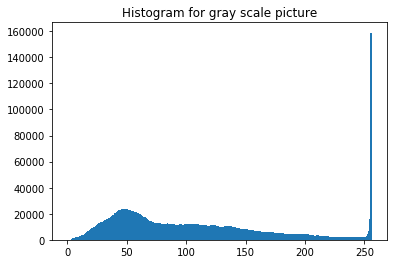

In [5]:
# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(image,256,[0,256])
a = plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [6]:
hist = list(filter(lambda a: a != 0, hist))
print(len(hist))

256


In [7]:
format(14, '#010b')

'0b00001110'

In [8]:
format(256, '#010b')

'0b100000000'

In [9]:
format(256, '09b')

'100000000'

In [10]:
format(97, '09b')

'001100001'

In [21]:
f = open("Data.txt","r")
string = f.read()
print (string)

97


In [22]:
data = ''
for i in string:
    data += convert(i)
print (string)
print (data)

97
000111001000110111
